In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
df = pd.read_csv('./out/df.csv')

df["date"] = pd.to_datetime(df["date"], errors="coerce")
df_recent = df[df["date"] >= "2024-01-01"] 

In [284]:
#Plot the mean damages of the roles 
mean_adc_dmgshare = df['adc_damageshare'].mean() * 100
mean_jng_dmgshare = df['jng_damageshare'].mean() * 100

mean_adc_dmgeff = df['adc_dmgefficiency'].mean()
mean_jng_dmgeff = df['jng_dmgefficiency'].mean()

mean_dpm_adc = df['adc_dpm'].mean()
mean_dpm_jng = df['jng_dpm'].mean() 

print(f'For adc: {mean_dpm_adc}, for jng: {mean_dpm_jng}')

In [6]:
#Kill participation
df['adc_killpart'] = ((df['adc_kills'] + df['adc_assists']) / df['kills']) * 100
df['jng_killpart'] = ((df['jng_kills'] + df['jng_assists']) / df['kills']) * 100
mean_adc = df['adc_killpart'].mean()
mean_jng = df['jng_killpart'].mean()
print(f'adc: {mean_adc}, jng: {mean_jng}')

adc: 66.65675572490726, jng: 70.06893267143522


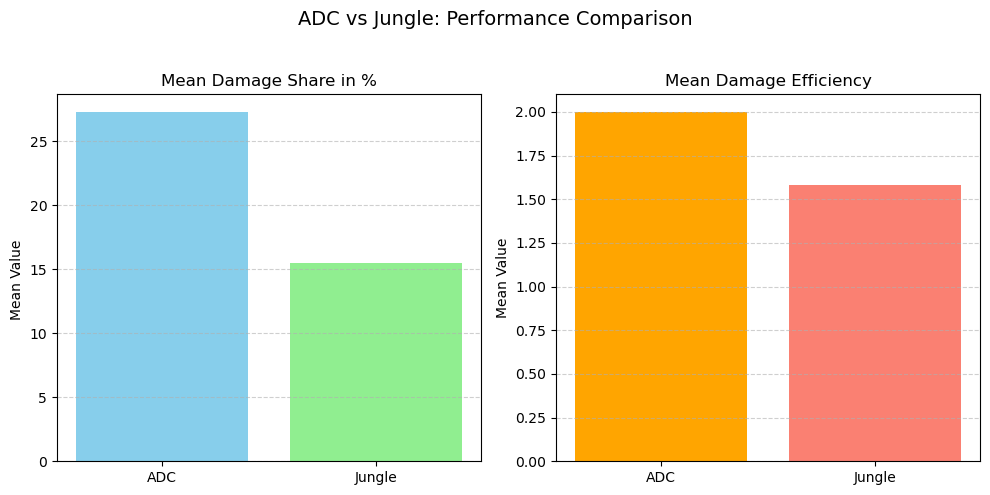

In [285]:
roles = ['ADC', 'Jungle']
dmgshare = [mean_adc_dmgshare, mean_jng_dmgshare]
dmgeff = [mean_adc_dmgeff, mean_jng_dmgeff]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].bar(roles, dmgshare, color=['skyblue', 'lightgreen'])
axes[0].set_title('Mean Damage Share in %')
axes[0].set_ylabel('Mean Value ')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

axes[1].bar(roles, dmgeff, color=['orange', 'salmon'])
axes[1].set_title('Mean Damage Efficiency')
axes[1].set_ylabel('Mean Value')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('ADC vs Jungle: Performance Comparison', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

We want to run a logistic regression over the early features e.g. golddiffat15 and the late game features e.g. the damage statistics for adc

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [287]:
eary_features = ['jng_golddiffat15', 'adc_golddiffat15']
late_features_adc = ['adc_kills', 'adc_damageshare', 'adc_damagetochampions', 'adc_dpm']
features_adc = ['adc_kills', 'adc_damageshare', 'adc_damagetochampions', 'adc_dpm', 'adc_damagetakenperminute', 'adc_assists']
features_jng = ['jng_kills', 'jng_damageshare', 'jng_damagetochampions', 'jng_dpm', 'jng_damagetakenperminute', 'jng_deaths', 'jng_assists']

In [288]:
#Early model
X = df[early_features_adc]
y = df['result']

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Create the train and test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

log_reg = LogisticRegression()
#Train model on the training data
log_reg.fit(X_train, y_train)

#Predict using the testing data
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

#Print results
print(f'Accuracy:{accuracy_score(y_test, y_pred)}')
print("AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:0.6379614614137175
AUC: 0.6898959318923729
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64     21157
           1       0.63      0.64      0.64     20775

    accuracy                           0.64     41932
   macro avg       0.64      0.64      0.64     41932
weighted avg       0.64      0.64      0.64     41932



In [289]:
#Now do the same using the lategame features
X = df[late_features_adc]
y = df['result']

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Create the train and test split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.3)

log_reg_late = LogisticRegression()
#Train model on the training data
log_reg_late.fit(X_train, y_train)

#Predict using the testing data
y_pred = log_reg_late.predict(X_test)
y_prob = log_reg_late.predict_proba(X_test)[:,1]

#Print results
print(f'Accuracy:{accuracy_score(y_test, y_pred)}')
print("AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:0.7453973099303635
AUC: 0.8206842421056219
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76     21157
           1       0.76      0.71      0.73     20775

    accuracy                           0.75     41932
   macro avg       0.75      0.75      0.74     41932
weighted avg       0.75      0.75      0.74     41932



In [290]:
X_adc = df[features_adc]
y_adc = df['result']

#Scale features
scaler = StandardScaler()
X_adc_scaled = scaler.fit_transform(X_adc)

#Create the train and test split 
X_train_adc, X_test_adc, y_train_adc, y_test_adc = train_test_split(X_adc_scaled, y_adc, random_state=42, test_size=0.3)

log_reg_adc = LogisticRegression()
#Train model on the training data
log_reg_adc.fit(X_train_adc, y_train_adc)

#Predict using the testing data
y_pred_adc = log_reg_adc.predict(X_test_adc)
y_prob_adc = log_reg_adc.predict_proba(X_test_adc)[:,1]

#Print results
print(f'Accuracy:{accuracy_score(y_test_adc, y_pred_adc)}')
print("AUC:", roc_auc_score(y_test_adc, y_prob_adc))
print("Classification Report:\n", classification_report(y_test_adc, y_pred_adc))

Accuracy:0.8485881904035104
AUC: 0.9217270185701796
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85     21157
           1       0.85      0.84      0.85     20775

    accuracy                           0.85     41932
   macro avg       0.85      0.85      0.85     41932
weighted avg       0.85      0.85      0.85     41932



In [291]:
X_jng = df[features_jng]
y_jng = df['result']

#Scale features
scaler = StandardScaler()
X_jng_scaled = scaler.fit_transform(X_jng)

#Create the train and test split 
X_train_jng, X_test_jng, y_train_jng, y_test_jng = train_test_split(X_jng_scaled, y_jng, random_state=42, test_size=0.3)

log_reg_jng = LogisticRegression()
#Train model on the training data
log_reg_jng.fit(X_train_jng, y_train_jng)

#Predict using the testing data
y_pred_jng = log_reg_jng.predict(X_test_jng)
y_prob_jng = log_reg_jng.predict_proba(X_test_jng)[:,1]

#Print results
print(f'Accuracy:{accuracy_score(y_test_jng, y_pred_jng)}')
print("AUC:", roc_auc_score(y_test_jng, y_prob_jng))
print("Classification Report:\n", classification_report(y_test_jng, y_pred_jng))

Accuracy:0.8819755795096823
AUC: 0.9483022321174905
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     21157
           1       0.88      0.88      0.88     20775

    accuracy                           0.88     41932
   macro avg       0.88      0.88      0.88     41932
weighted avg       0.88      0.88      0.88     41932



In [292]:
#Try to create a model where we include both jng and adc features 
features = features_adc + features_jng

X_comp = df[features]
y_comp = df['result']

#Scale features
scaler = StandardScaler()
X_comp_scaled = scaler.fit_transform(X_comp)

X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(X_comp_scaled, y_comp, random_state=42, test_size=0.3)

log_reg_comp = LogisticRegression()
#Train model on the training data
log_reg_comp.fit(X_train_comp, y_train_comp)

#Predict using the testing data
y_pred_comp = log_reg_comp.predict(X_test_comp)
y_prob_comp = log_reg_comp.predict_proba(X_test_comp)[:,1]

#Print results
print(f'Accuracy:{accuracy_score(y_test_comp, y_pred_comp)}')
print("AUC:", roc_auc_score(y_test_comp, y_prob_comp))
print("Classification Report:\n", classification_report(y_test_comp, y_pred_comp))


Accuracy:0.9088524277401507
AUC: 0.9662846951281141
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     21157
           1       0.91      0.91      0.91     20775

    accuracy                           0.91     41932
   macro avg       0.91      0.91      0.91     41932
weighted avg       0.91      0.91      0.91     41932



In [ ]:
test_df_comp = df.iloc[y_test_comp.index].copy()

#predictions 
test_df_comp['pred_prob_comp'] = y_prob_comp
test_df_comp['pred_result_comp'] = y_pred_comp

correct_win_pred = test_df_comp[
    (test_df_comp['pred_result_comp'] == 1) & (test_df_comp['result'] == 1)
    ]

incorrect_win_pred = test_df_comp[
    (test_df_comp['pred_result_comp'] == 1) & (test_df_comp['result'] == 0)
]

correct_loss_pred = test_df_comp[
    (test_df_comp['pred_result_comp'] == 0) & (test_df_comp['result'] == 0)
    ]

incorrect_loss_pred = test_df_comp[
    (test_df_comp['pred_result_comp'] == 0) & (test_df_comp['result'] == 1)
]

other_features = [col for col in test_df_comp.columns if col not in features + ['result', 'predicted_prob_late', 'predicted_result_late', 'gameid', 'teamid', 'side', 'date', 'adc_golddiffat20', 'adc_golddiffat25', 'jng_golddiffat20', 'jng_golddiffat25', 'sigma_before', 'sigma_after', 'mu_before', 'mu_after', 'rating_before', 'rating_after', 'pred_prob_comp', 'pred_prob_late', 'pred_result_comp']]


comparison_win = incorrect_win_pred[other_features].mean() - correct_win_pred[other_features].mean()
comparison_loss = incorrect_loss_pred[other_features].mean() - correct_loss_pred[other_features].mean()

comparison_win.sort_values(ascending=False).head(15)

damagetochampions    21369.090826
earnedgold           13914.617336
adc_earnedgold        3407.529805
jng_earnedgold        2225.031249
golddiffat15          1802.512599
adc_golddiffat15       405.358498
jng_golddiffat15       313.948436
gamelength             293.992912
total cs               197.907651
visionscore             45.210909
wardsplaced             23.221917
assists                 14.586319
wardskilled             13.787808
kills                    6.526059
wppm                     0.210850
dtype: float64

Both perform bad = a, adc bad jungle good = b, adc good jungle bad = c, both good = d

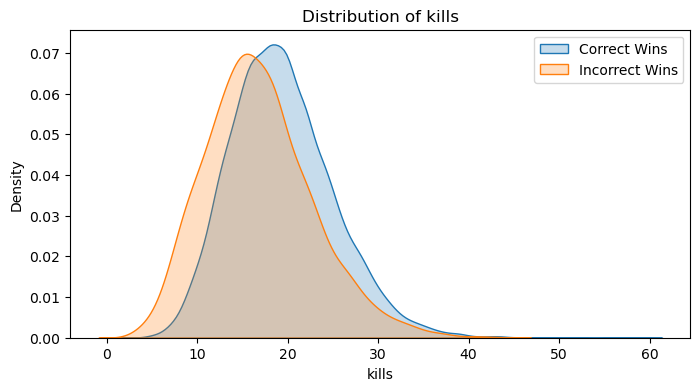

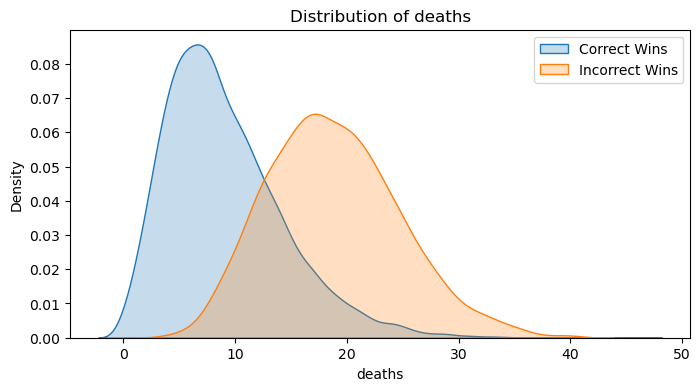

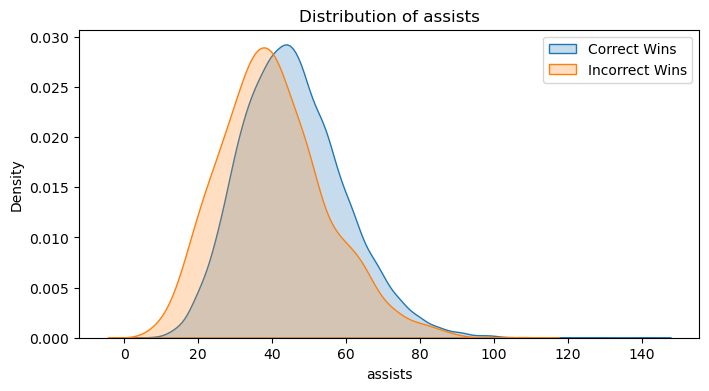

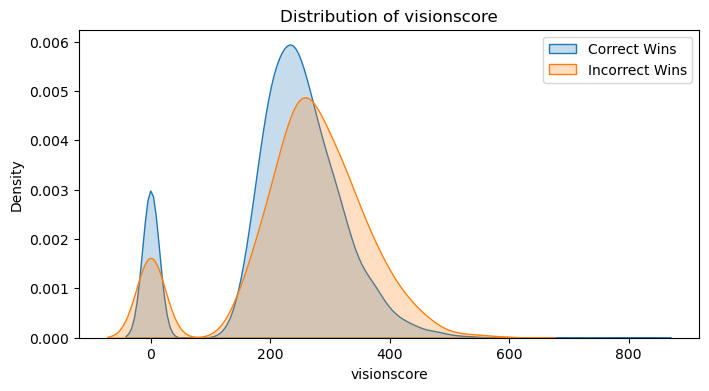

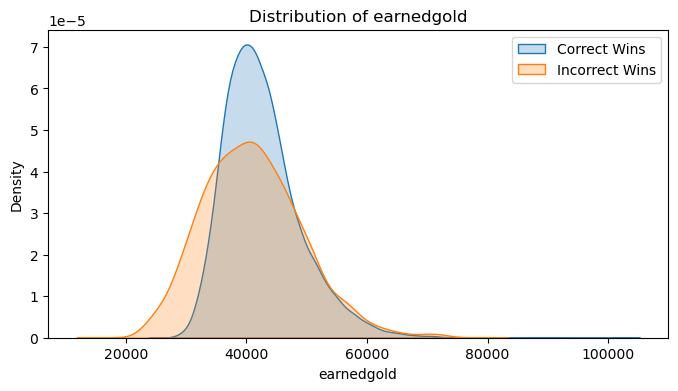

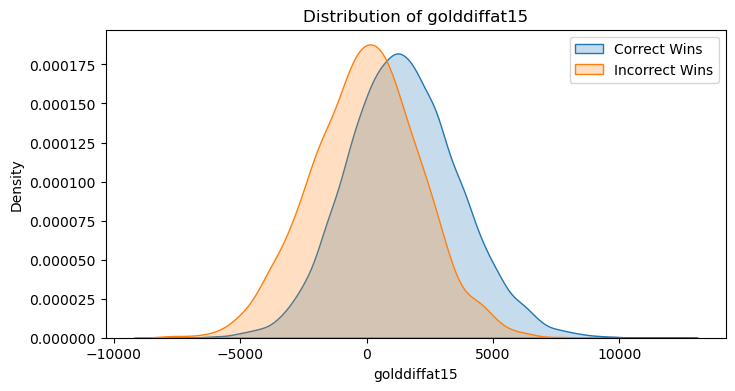

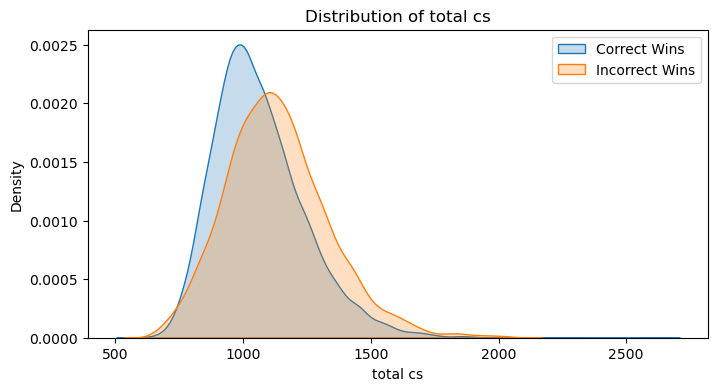

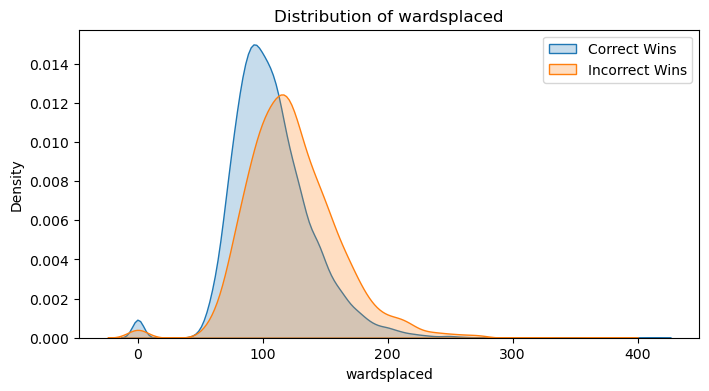

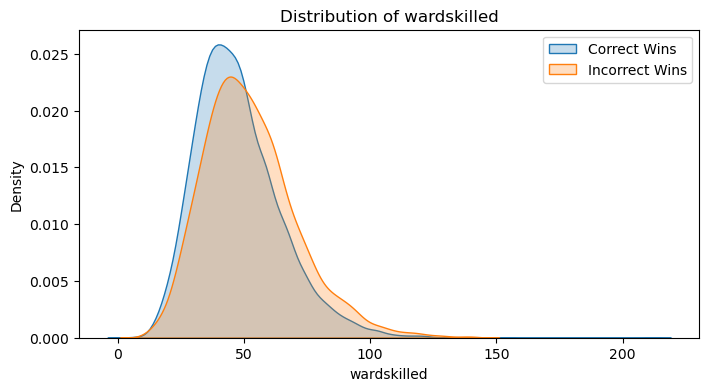

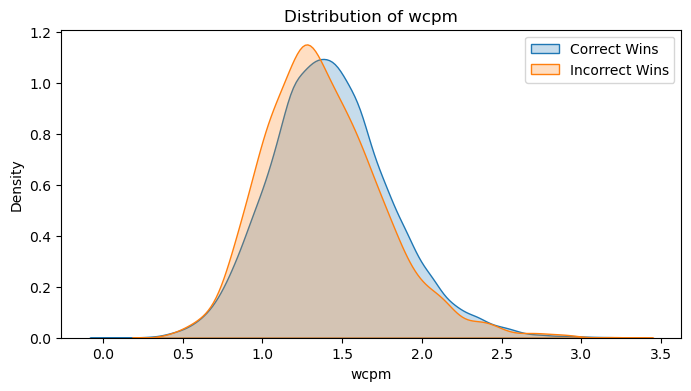

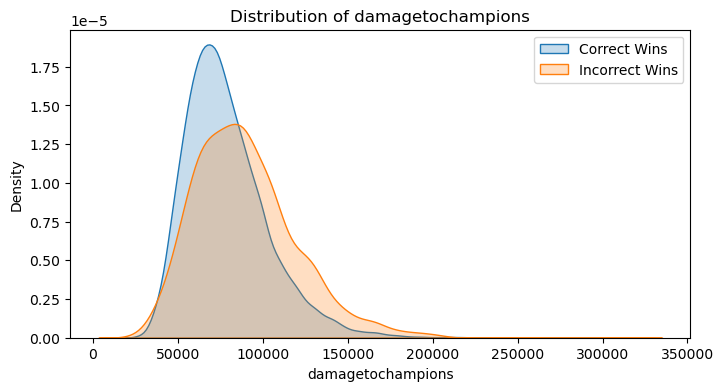

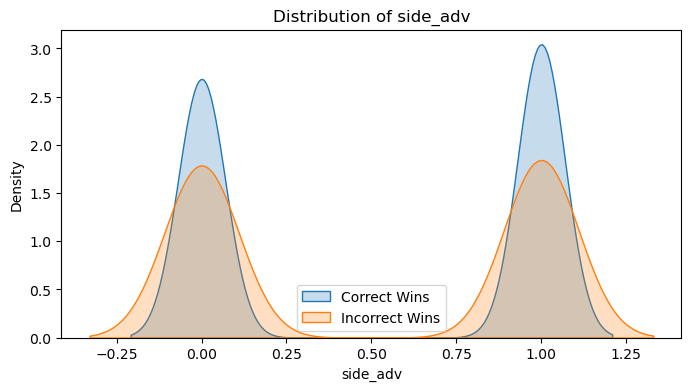

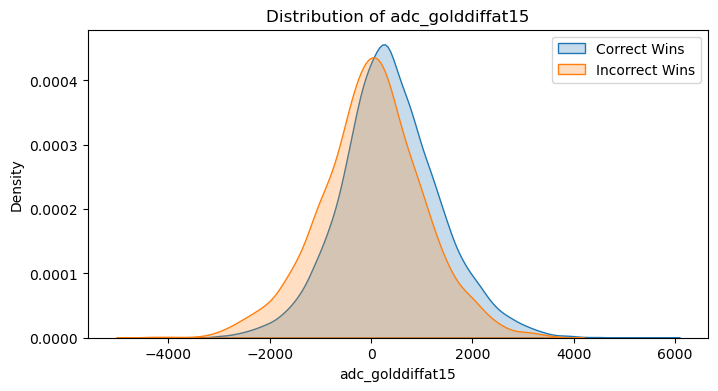

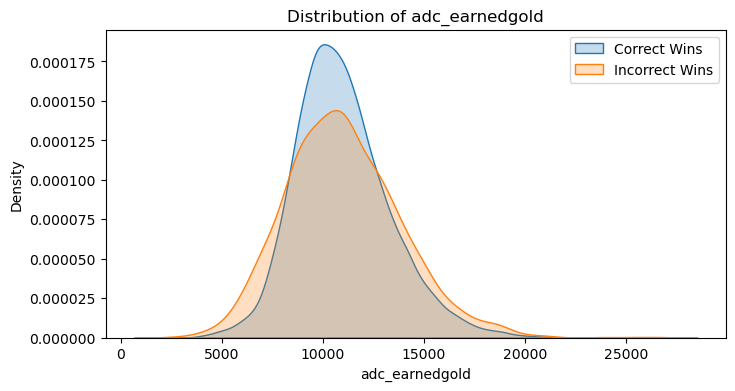

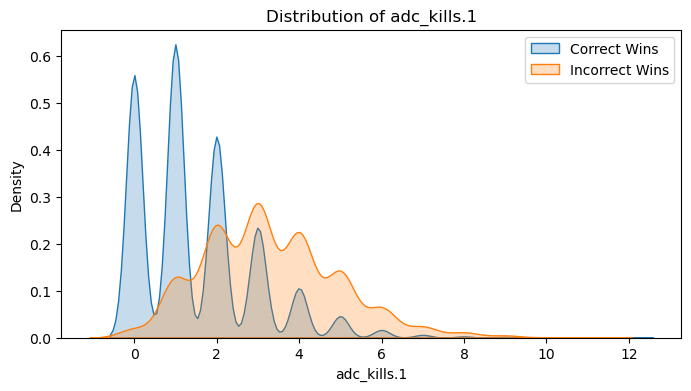

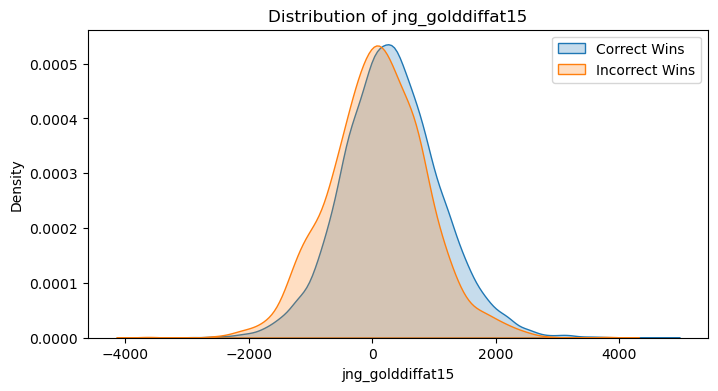

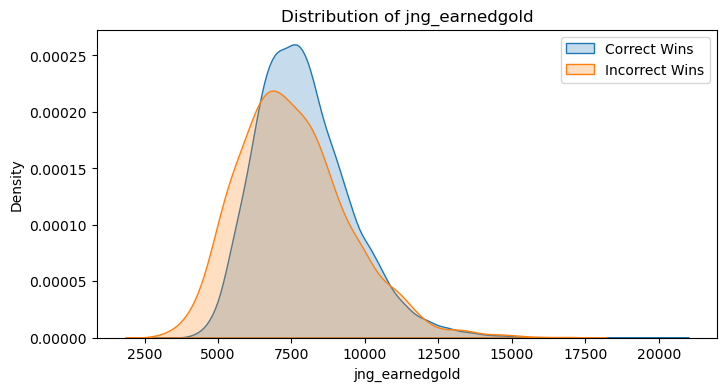

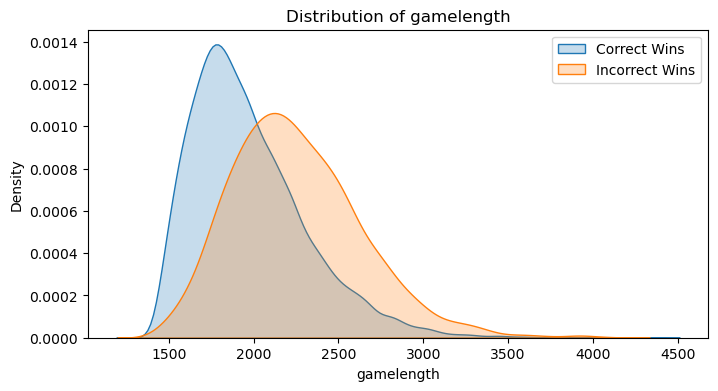

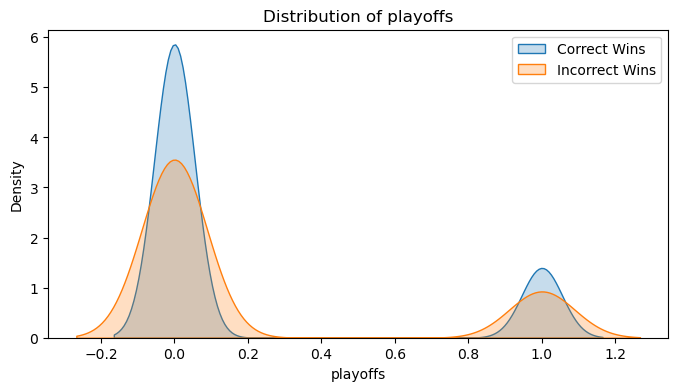

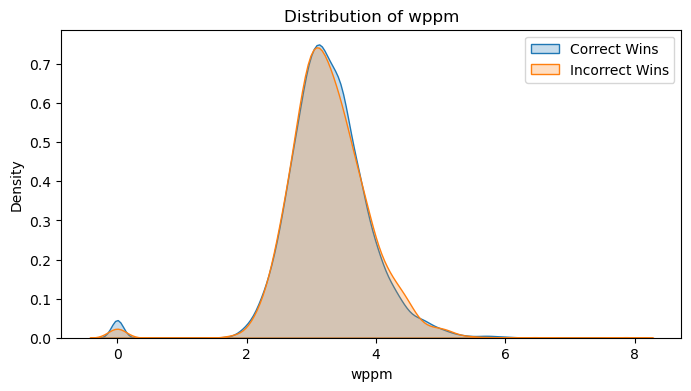

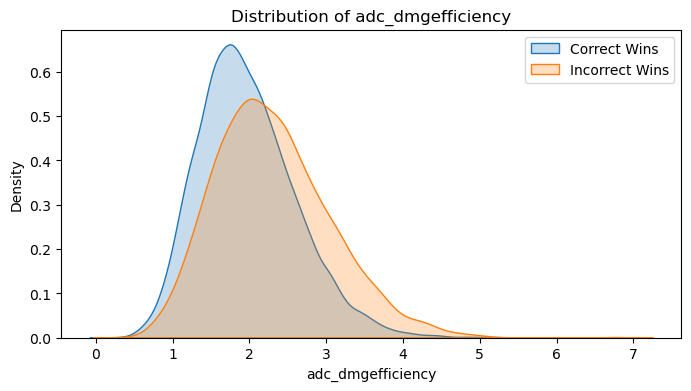

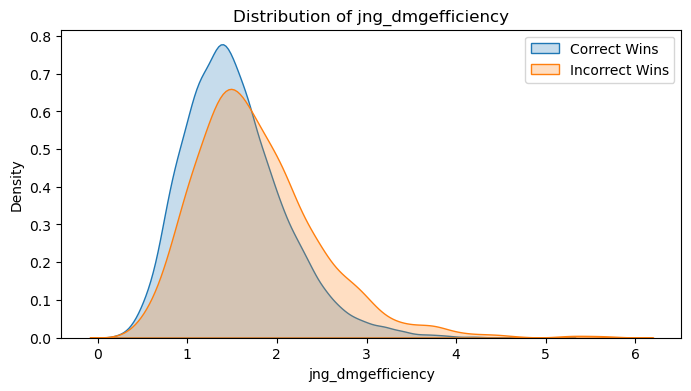

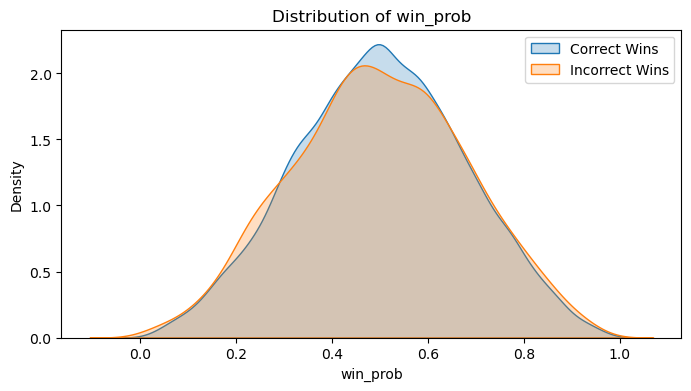

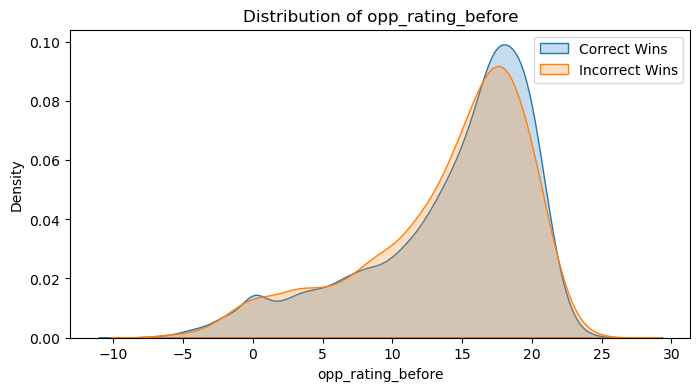

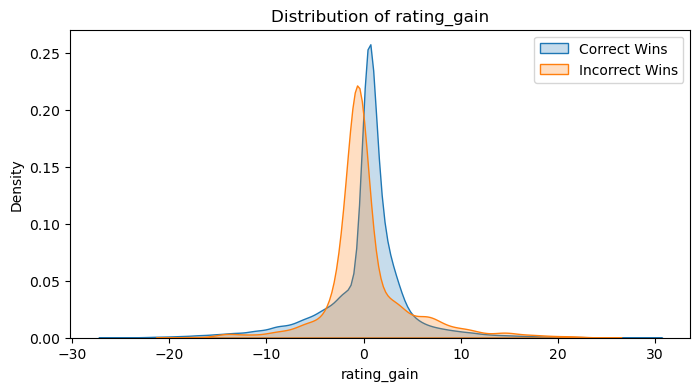

In [294]:
#deaths, gamelength 

#feature = "deaths"

for feature in other_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(correct_win_pred[feature], label="Correct Wins", fill=True)
    sns.kdeplot(incorrect_win_pred[feature], label="Incorrect Wins", fill=True)
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()

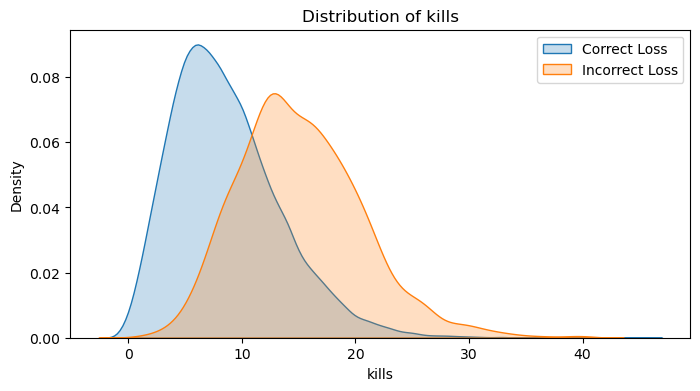

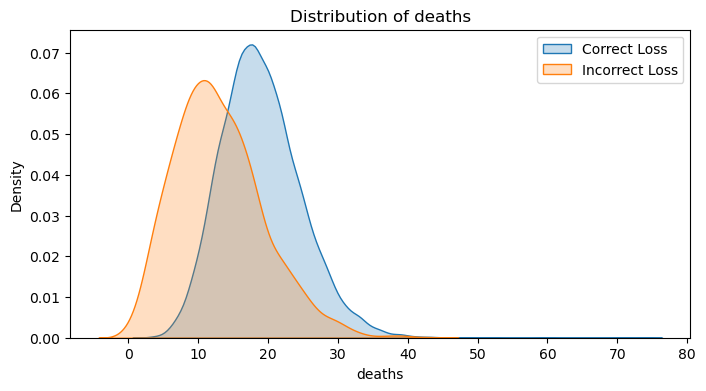

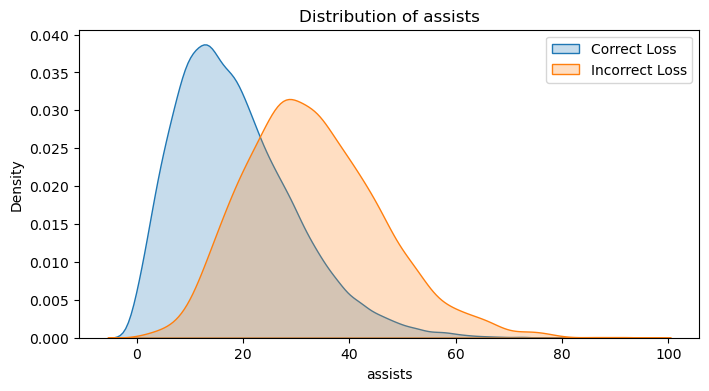

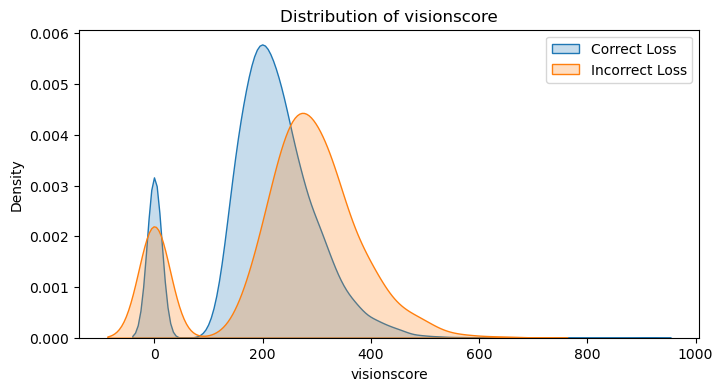

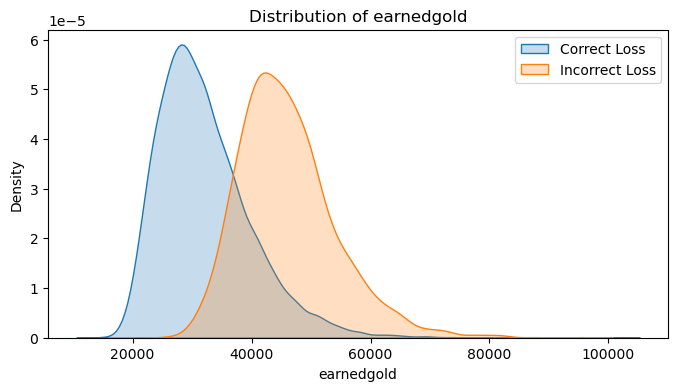

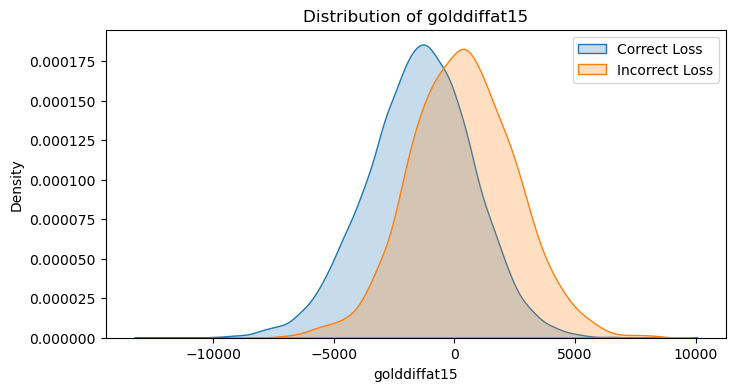

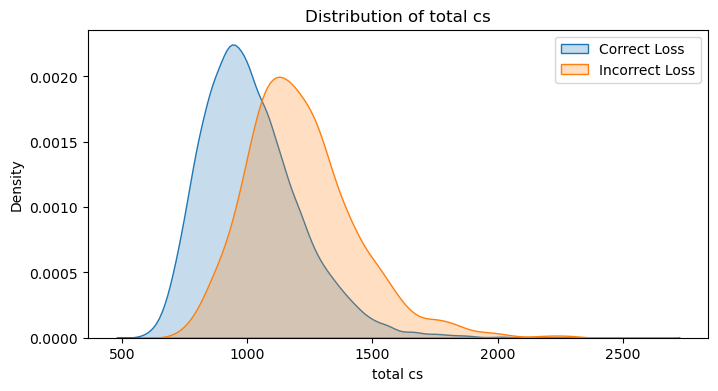

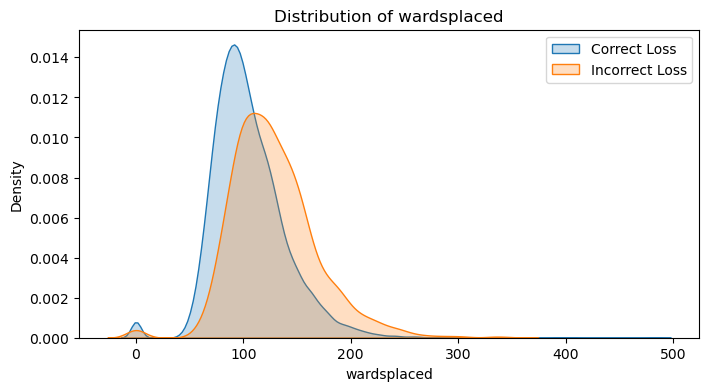

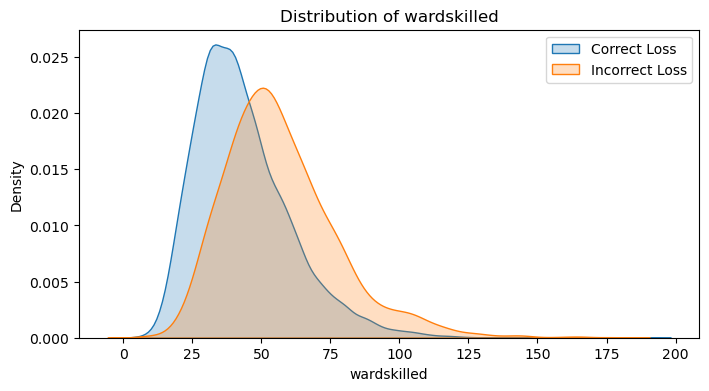

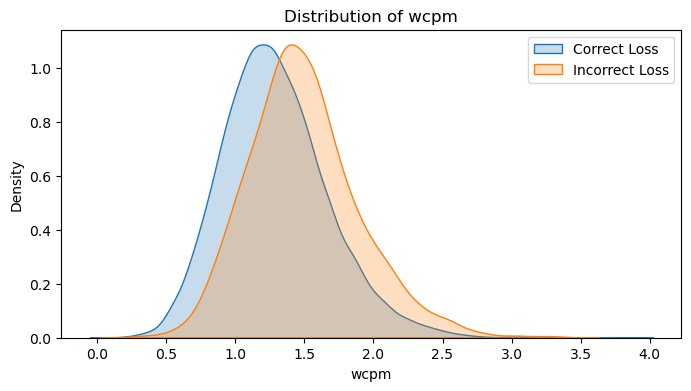

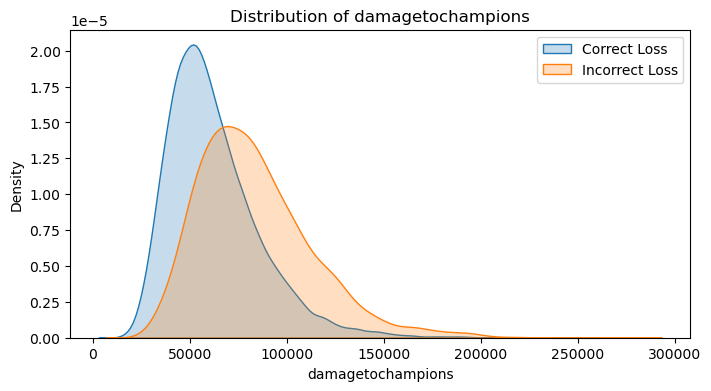

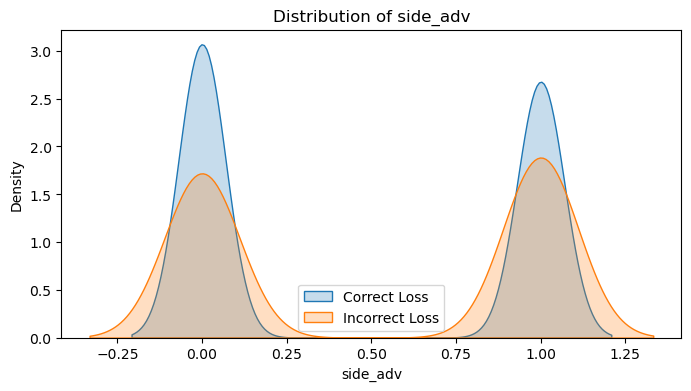

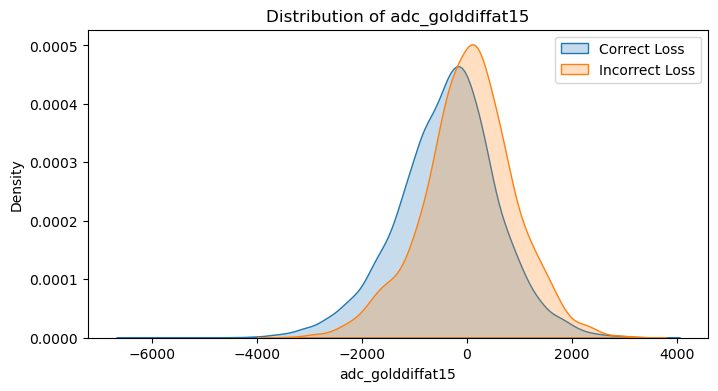

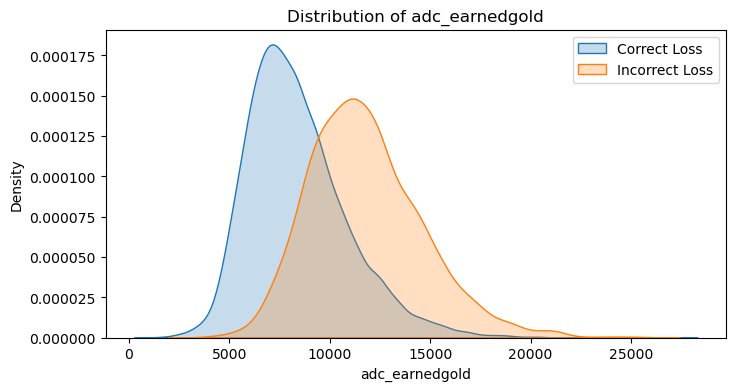

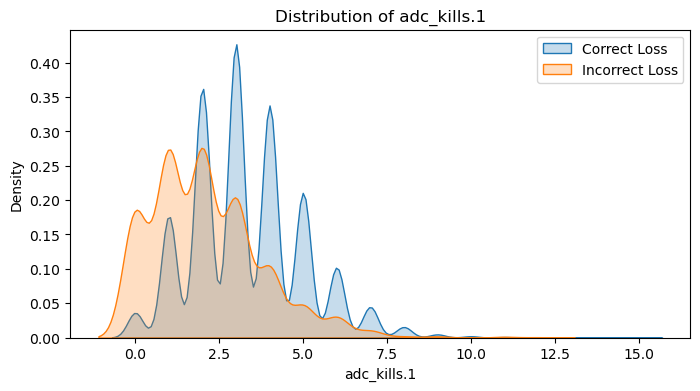

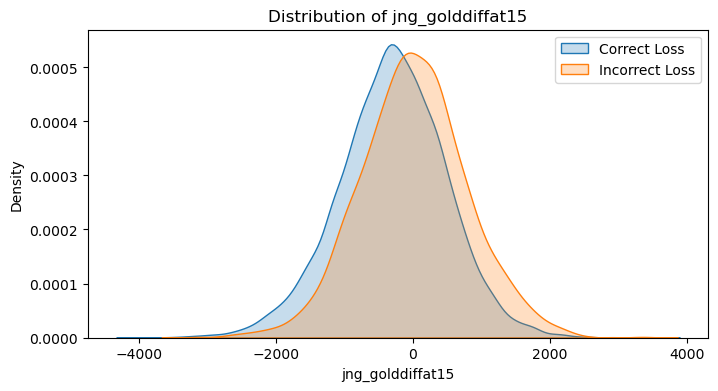

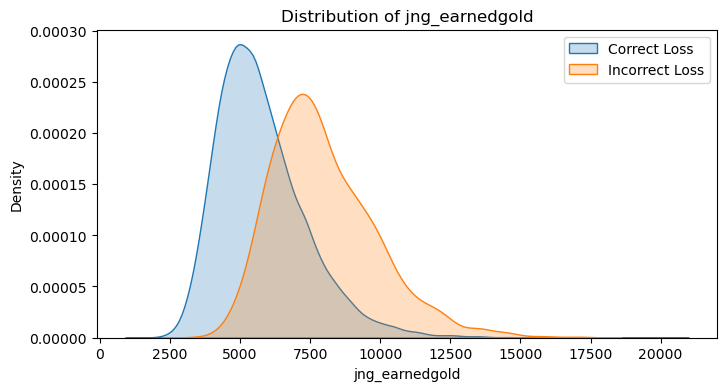

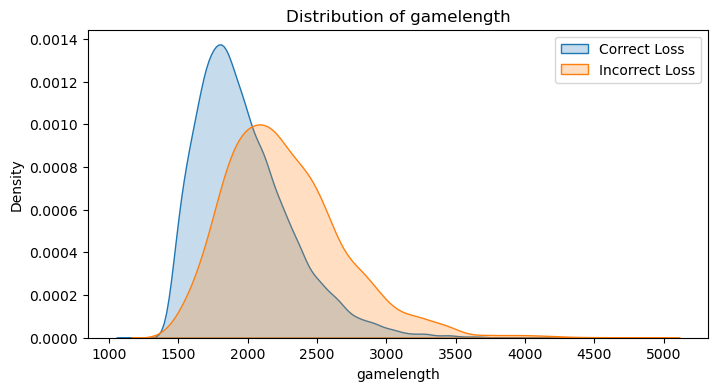

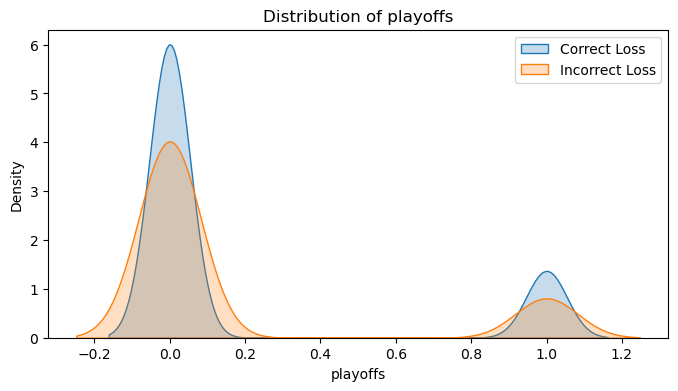

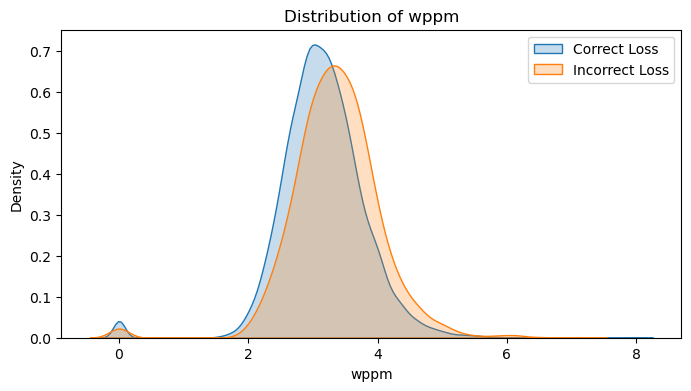

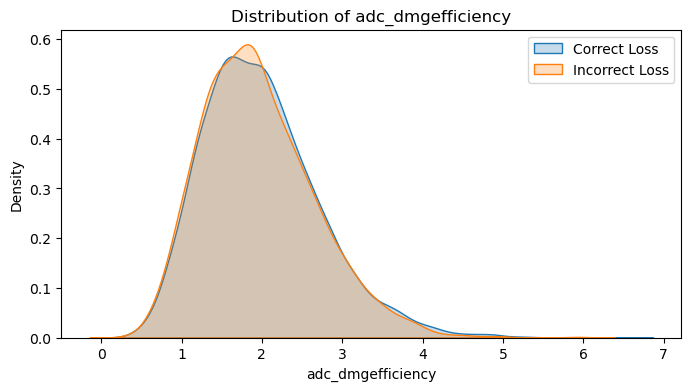

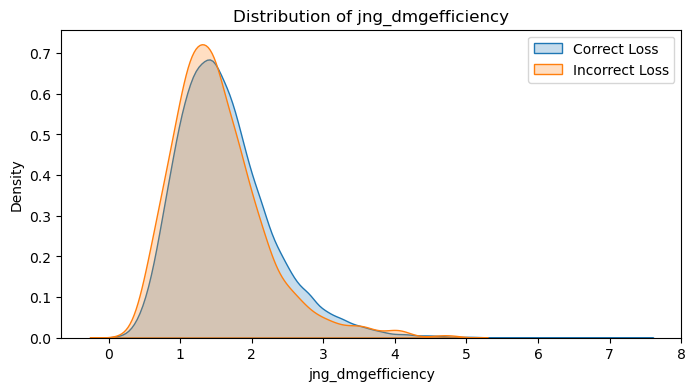

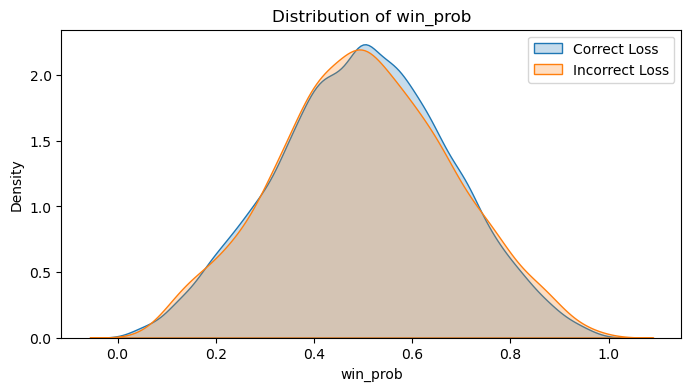

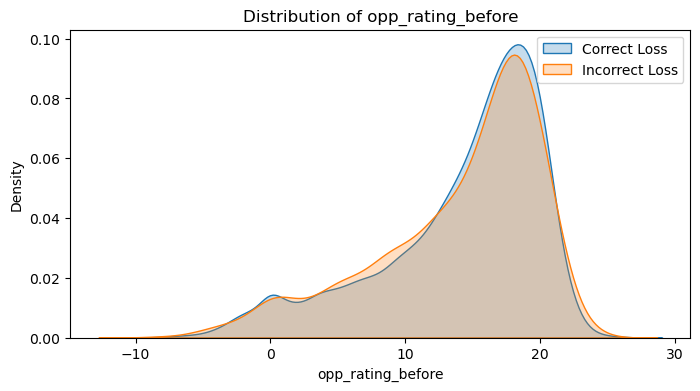

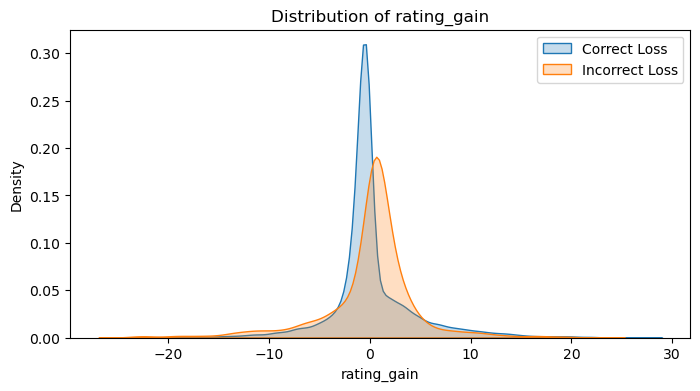

In [295]:
#deaths
#feature = "gamelength"
#see adc_golddiffat15 vs adc_earnedgold

for feature in other_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(correct_loss_pred[feature], label="Correct Loss", fill=True)
    sns.kdeplot(incorrect_loss_pred[feature], label="Incorrect Loss", fill=True)
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()

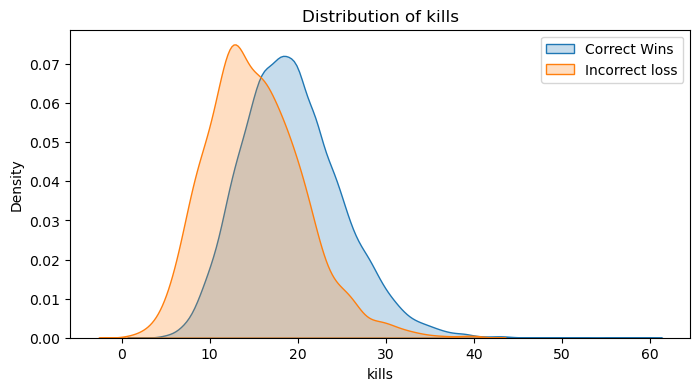

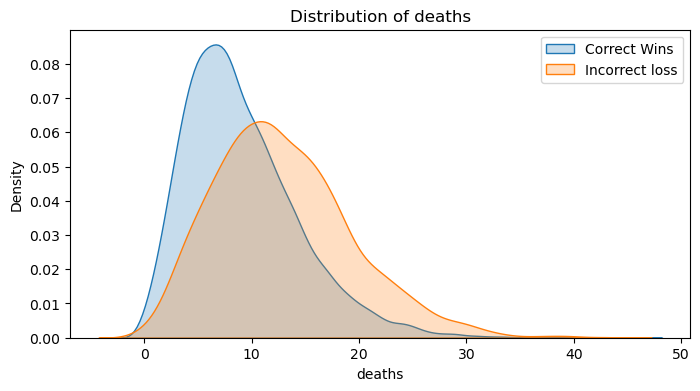

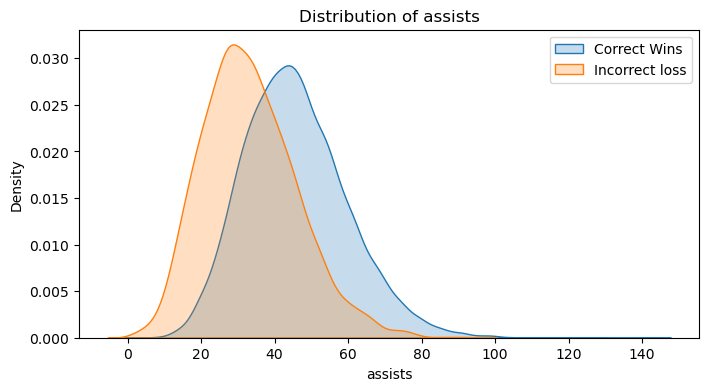

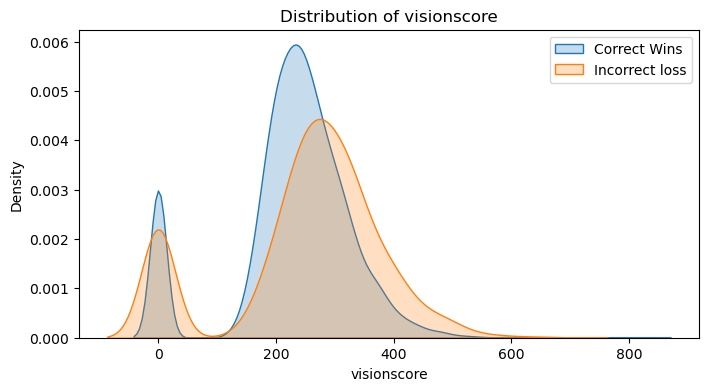

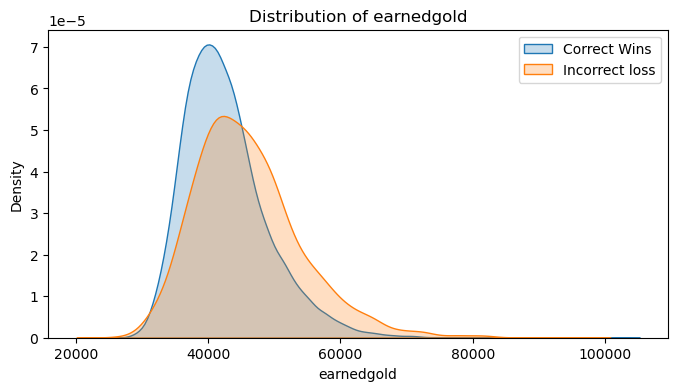

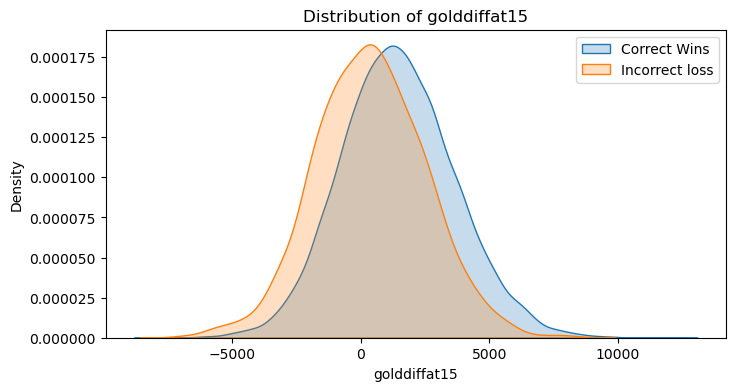

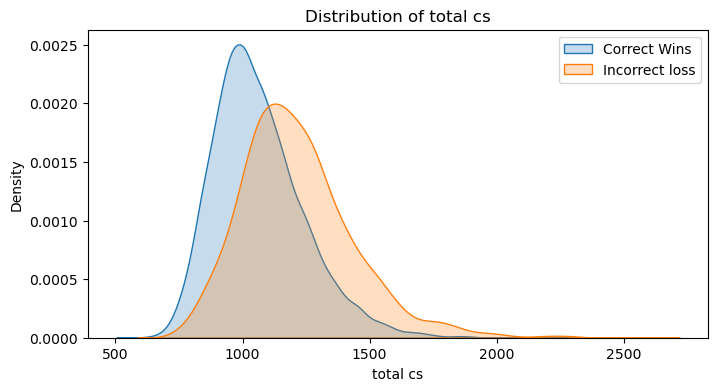

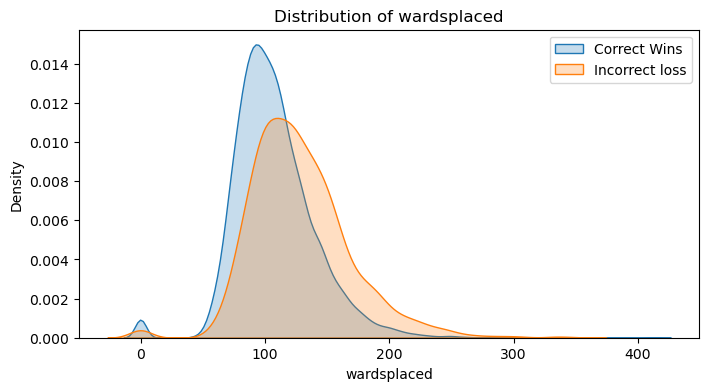

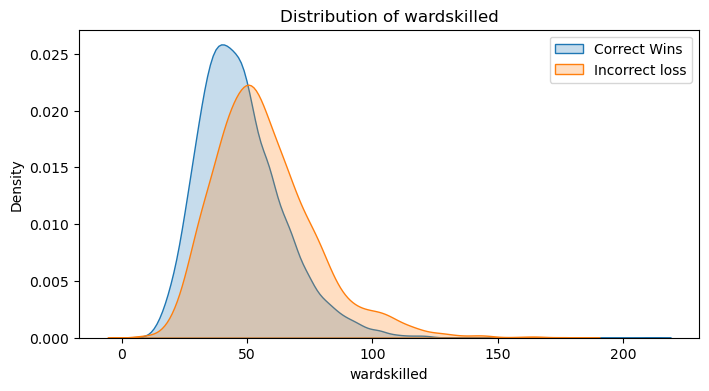

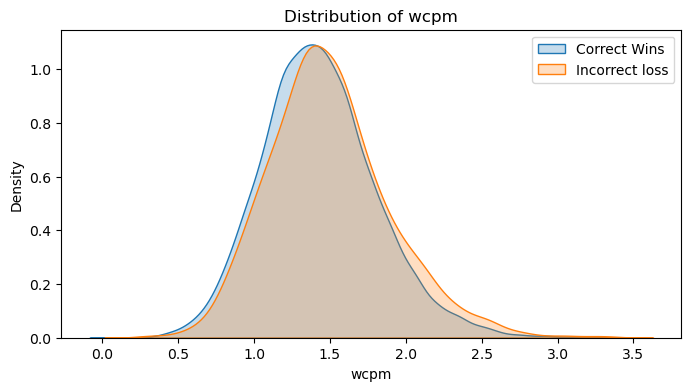

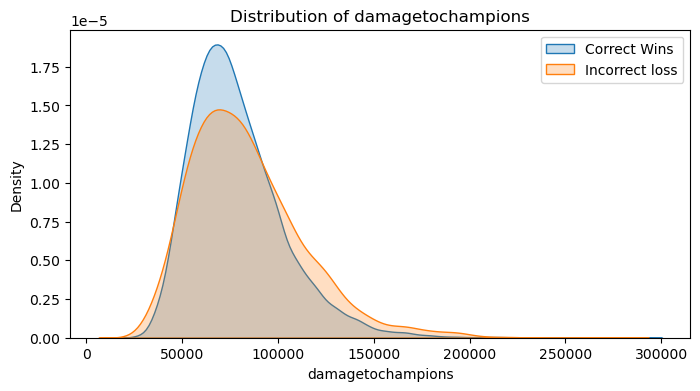

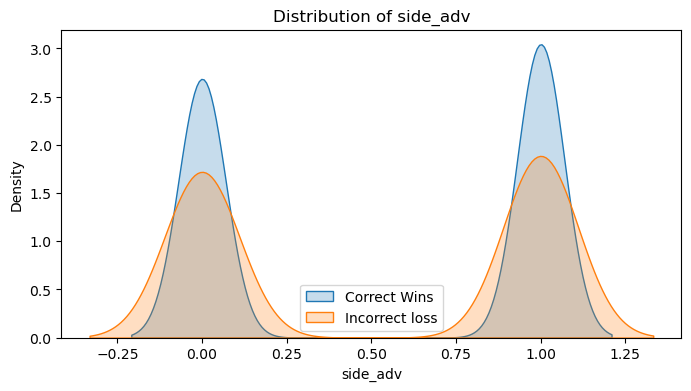

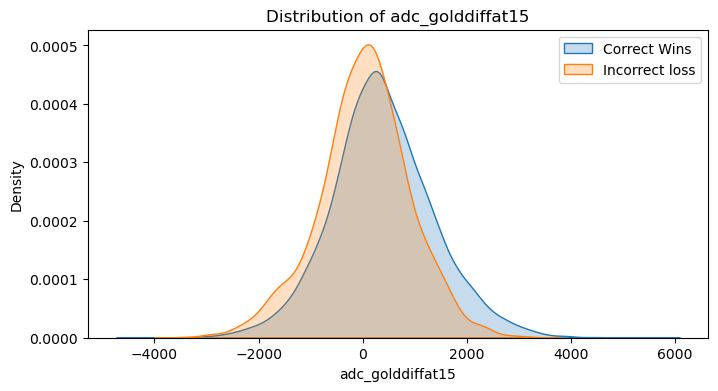

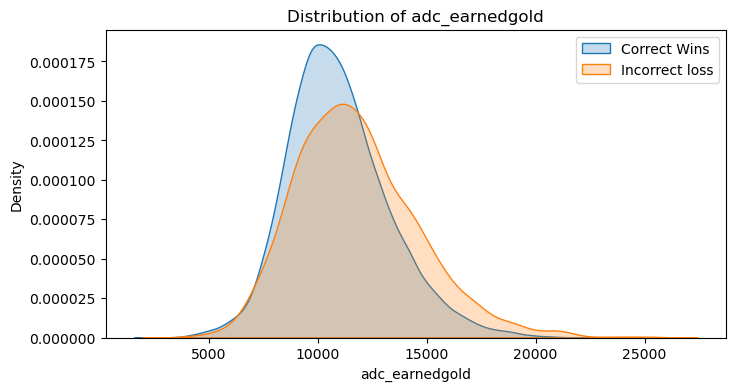

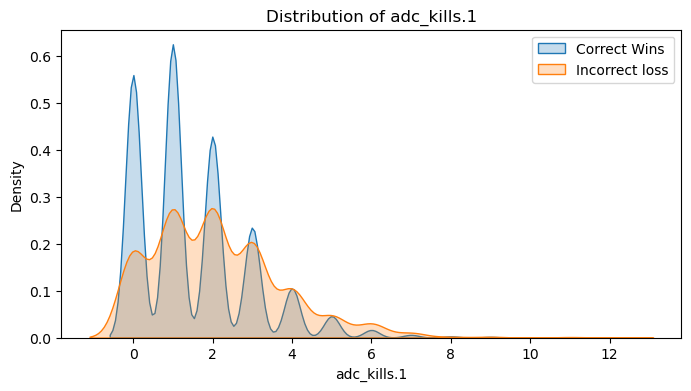

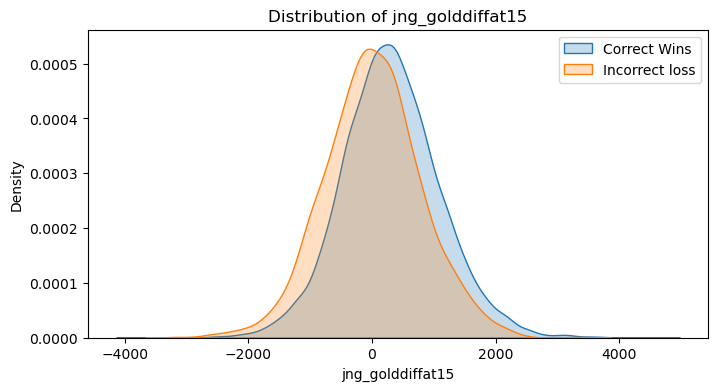

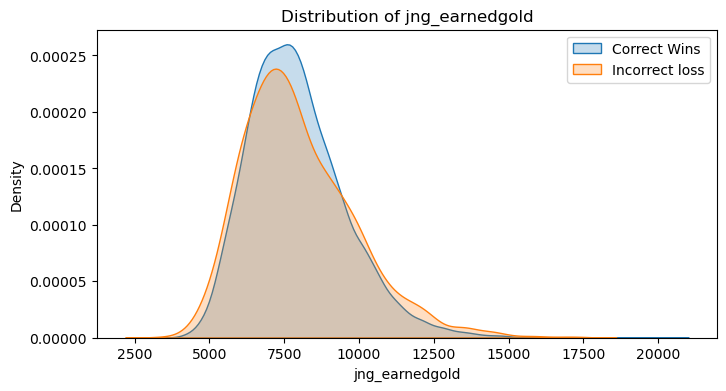

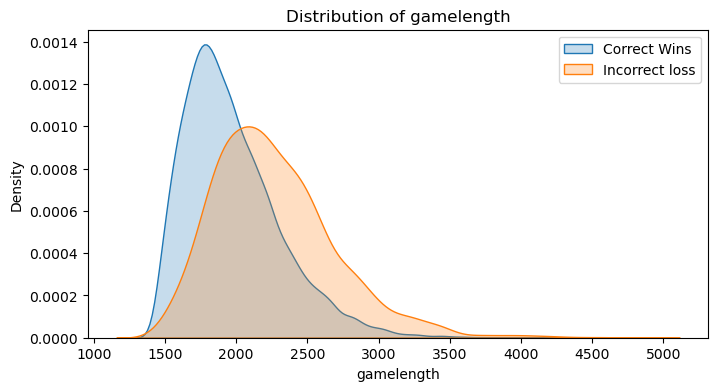

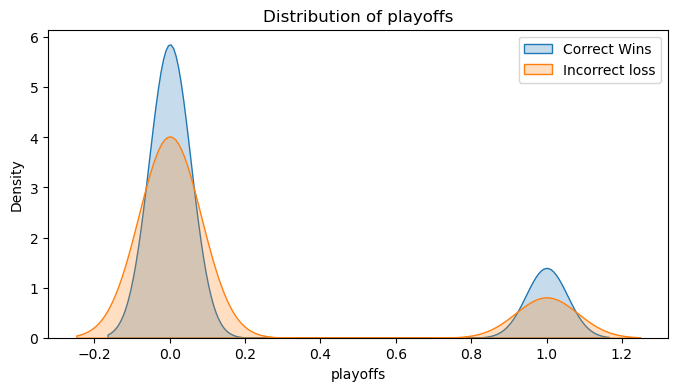

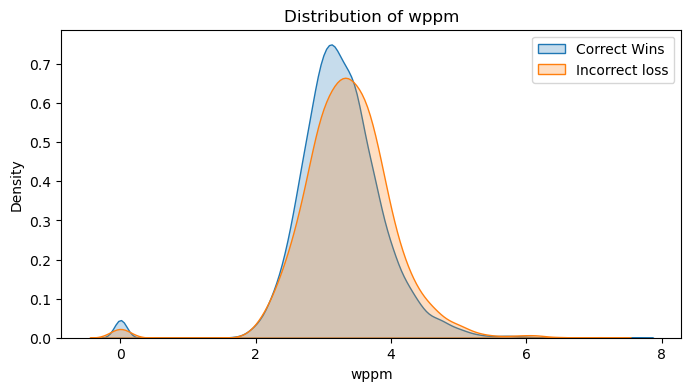

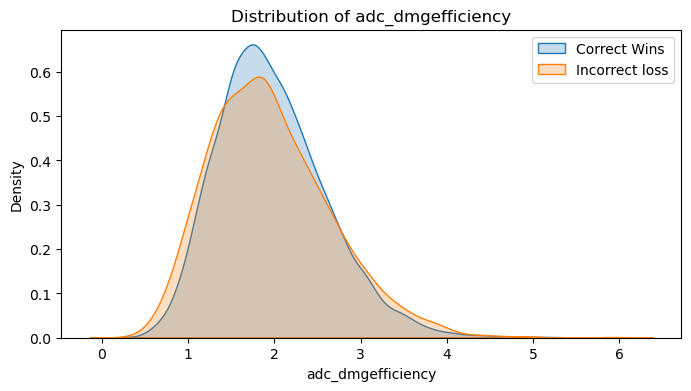

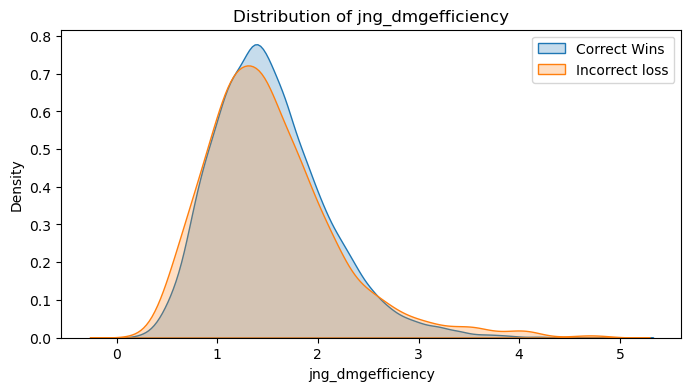

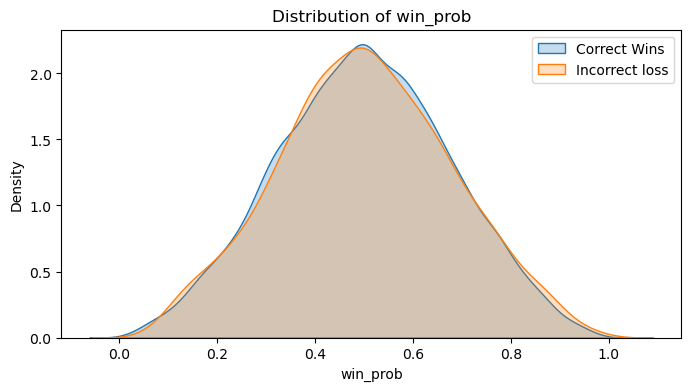

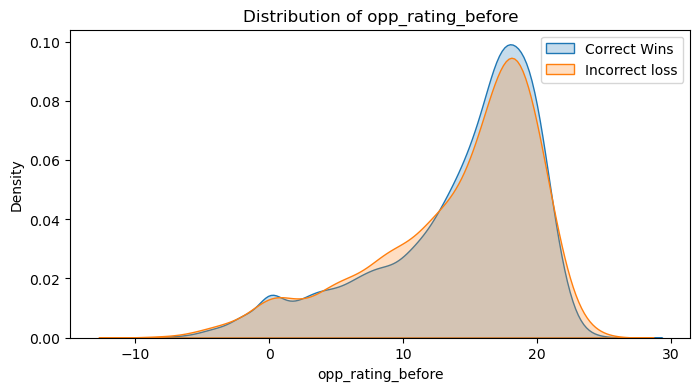

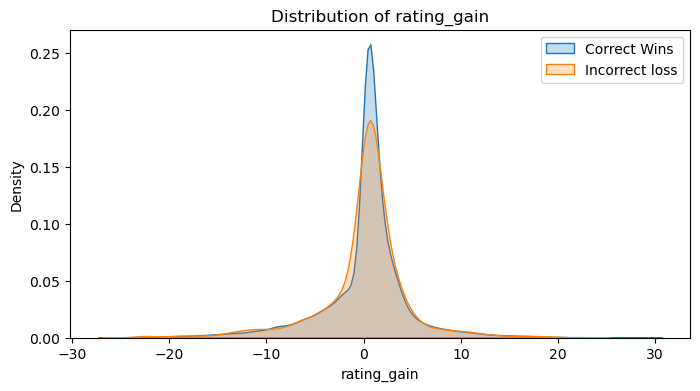

In [296]:
#difference incorrect loss and correct win 

for feature in other_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(correct_win_pred[feature], label="Correct Wins", fill=True)
    sns.kdeplot(incorrect_loss_pred[feature], label="Incorrect loss", fill=True)
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()

In [297]:
#We want to take a look at games where adc performs bad but jng good and other ways around and look at the actualy winrate of those games  
test_df = df.iloc[y_test.index].copy()

# Add prediction info
test_df['pred_prob_adc'] = y_prob_adc
test_df['pred_result_adc'] = y_pred_adc

test_df['pred_prob_jng'] = y_prob_jng
test_df['pred_result_jng'] = y_pred_jng

#add line for underdog stuff
test_df['underdog_won'] = ((test_df['win_prob']<0.5) & (test_df['result'] == 1)).astype(int)

#A: what if both perform bad 
a = test_df[
    (test_df['pred_result_adc'] == 0) & 
    (test_df['pred_result_jng'] == 0)
] 

#What if adc performs bad and jungle performs good 
b = test_df[
    (test_df['pred_result_adc'] == 0)&
    (test_df['pred_result_jng'] == 1)
]

#What if jungle performs bad and adc performs good
c = test_df[
    (test_df['pred_result_adc'] == 1)&
    (test_df['pred_result_jng'] == 0)
]

d = test_df[
    (test_df['pred_result_adc'] == 1)&
    (test_df['pred_result_jng'] == 1)
]

other_features = [col for col in test_df.columns if col not in features_adc + features_jng + ['result', 'predicted_prob_late', 'predicted_result_late', 'gameid', 'teamid', 'side', 'date']]

#Get the winrates for each 
print(f'Winrate for scenario a : {(a['result'] == 1).sum() / len(a)}')
print(f'Winrate for scenario b : {(b['result'] == 1).sum() / len(b)}')
print(f'Winrate for scenario c : {(c['result'] == 1).sum() / len(c)}')
print(f'Winrate for scenario d : {(d['result'] == 1).sum() / len(d)}')

print(f'Average rating gain for scenario a : {(a['rating_gain']).sum() / len(a)}')
print(f'Average rating gain for scenario b : {(b['rating_gain']).sum() / len(b)}')
print(f'Average rating gain for scenario c : {(c['rating_gain']).sum() / len(c)}')
print(f'Average rating gain for scenario d : {(d['rating_gain']).sum() / len(d)}')

mean_abs_rating_diff_a = (abs(a['rating_before'] - a['opp_rating_before'])).mean()
mean_abs_rating_diff_b = (abs(b['rating_before'] - b['opp_rating_before'])).mean()
mean_abs_rating_diff_c = (abs(c['rating_before'] - c['opp_rating_before'])).mean()
mean_abs_rating_diff_d = (abs(d['rating_before'] - d['opp_rating_before'])).mean()

print(f'Mean absolute rating diff for a : {mean_abs_rating_diff_a}')
print(f'Mean absolute rating diff for b : {mean_abs_rating_diff_b}')
print(f'Mean absolute rating diff for c : {mean_abs_rating_diff_c}')
print(f'Mean absolute rating diff for d : {mean_abs_rating_diff_d}')

mean_sigma_b = b['sigma_before'].mean()
mean_mu_b = b['mu_before'].mean()
max_rating_b = b['rating_before'].max()
min_rating_b = b['rating_before'].min()

mean_sigma_c = c['sigma_before'].mean()
mean_mu_c = c['mu_before'].mean()
max_rating_c = c['rating_before'].max()
min_rating_c = c['rating_before'].min()

print(f'Scenario b--> Average Mu : {mean_mu_b} and mean sigma: {mean_sigma_b}, min rating: {min_rating_b} max : {max_rating_b}')
print(f'Scenario C: Average mu: {mean_mu_c} and mean sigma : {mean_sigma_c}, min: {min_rating_c}, max: {max_rating_c}')

Winrate for scenario a : 0.05238794174099582
Winrate for scenario b : 0.6409774436090225
Winrate for scenario c : 0.44900932400932403
Winrate for scenario d : 0.933009025905521
Average rating gain for scenario a : 0.18857730287597355
Average rating gain for scenario b : 0.19666010970927253
Average rating gain for scenario c : 0.27032915860250994
Average rating gain for scenario d : 0.17775928368336655
Mean absolute rating diff for a : 4.5997540304776
Mean absolute rating diff for b : 4.433221914953933
Mean absolute rating diff for c : 4.819191748994234
Mean absolute rating diff for d : 4.660460598497185
Scenario b--> Average Mu : 24.843081738446493 and mean sigma: 3.3956842920485073, min rating: -9.004747739382994 max : 24.79996765996206
Scenario C: Average mu: 24.817408403230672 and mean sigma : 3.800719788436263, min: -6.77159559253607, max: 25.195867945894264


In [298]:
test_df['scenario'] = (
    test_df['pred_result_adc'].astype(str) +
    test_df['pred_result_jng'].astype(str)
)

# Map for readability
test_df['scenario'] = test_df['scenario'].map({
    '00': 'A: ADC bad, JNG bad',
    '01': 'B: ADC bad, JNG good',
    '10': 'C: ADC good, JNG bad',
    '11': 'D: ADC good, JNG good'
})

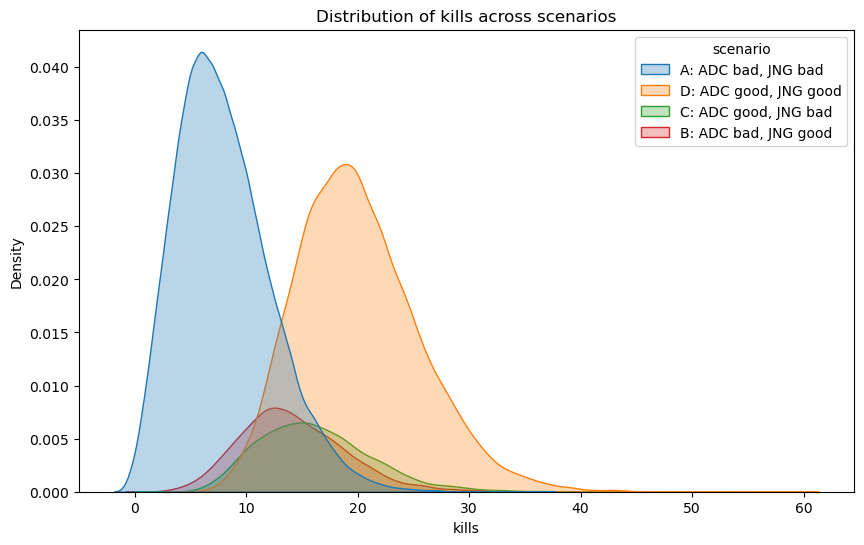

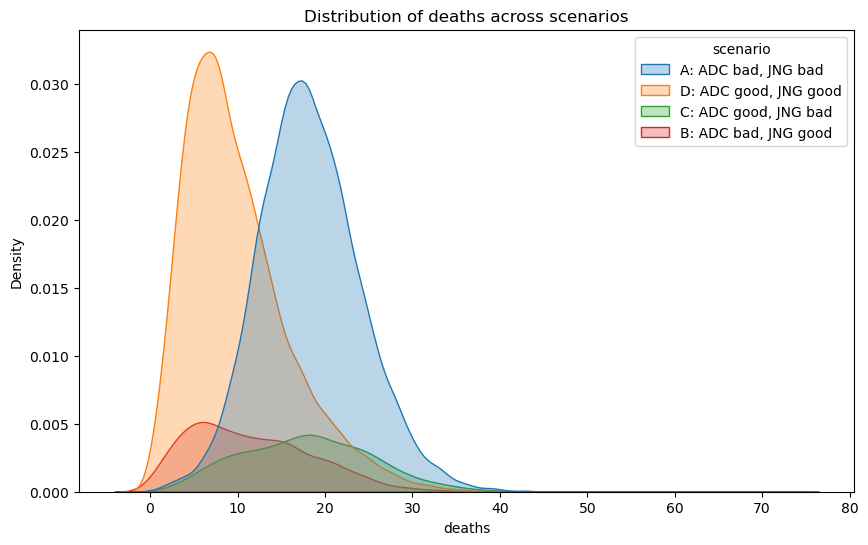

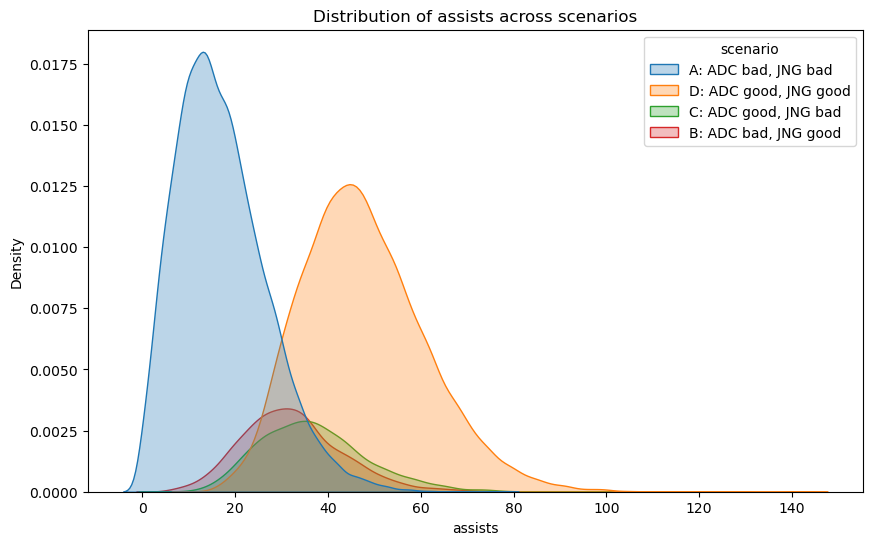

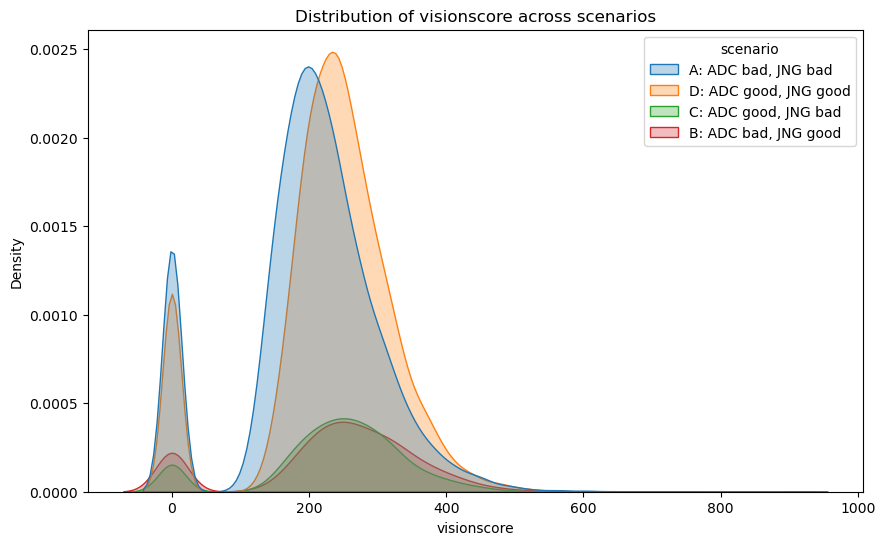

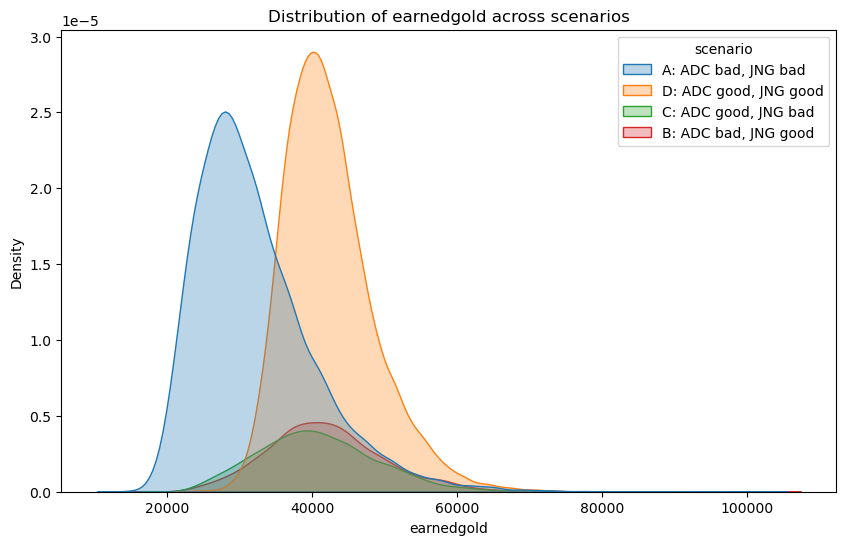

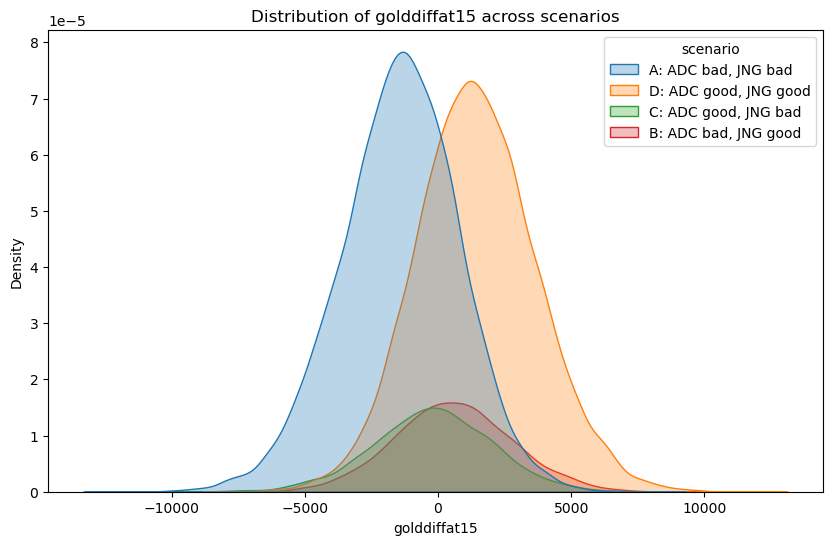

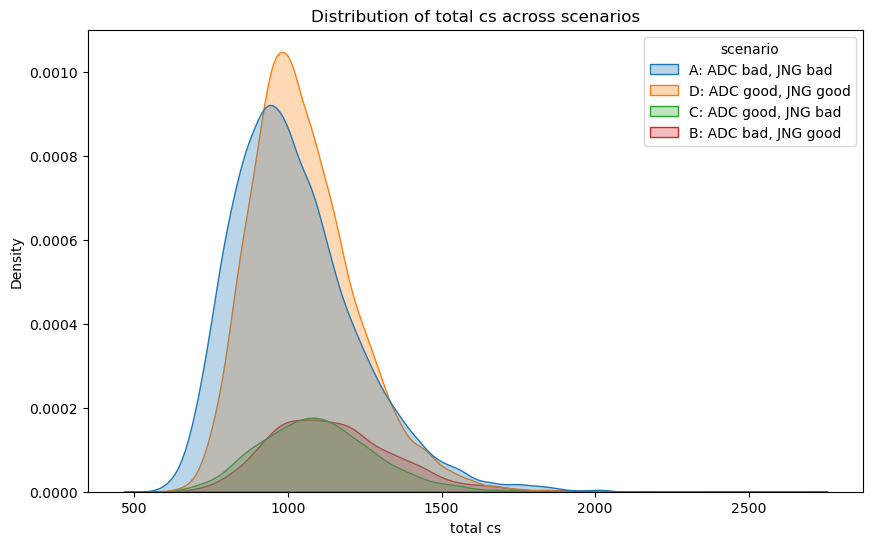

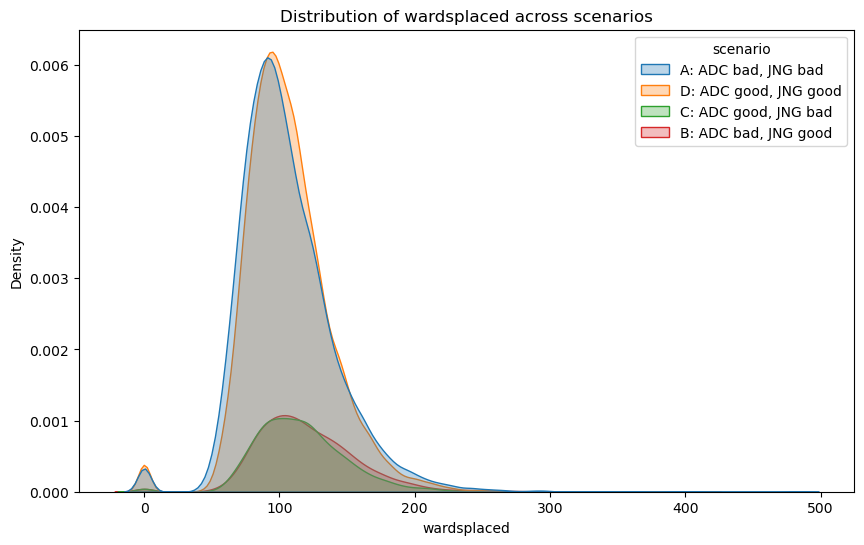

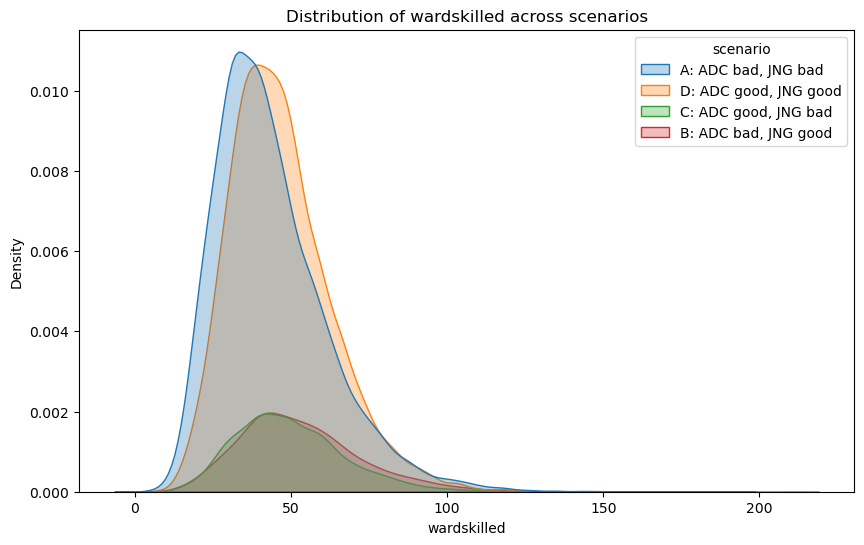

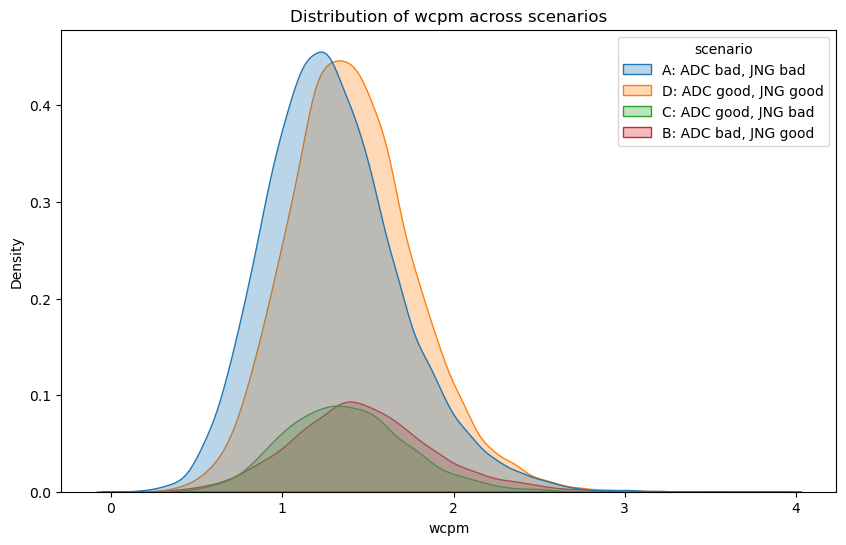

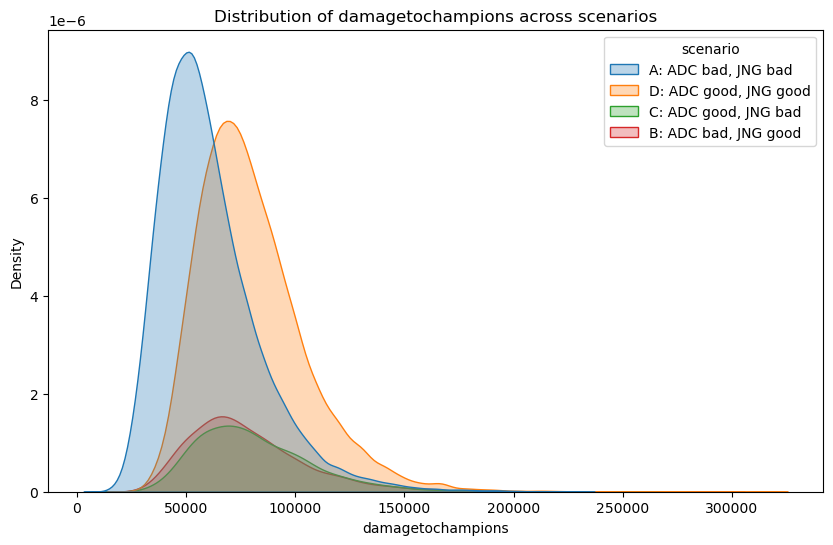

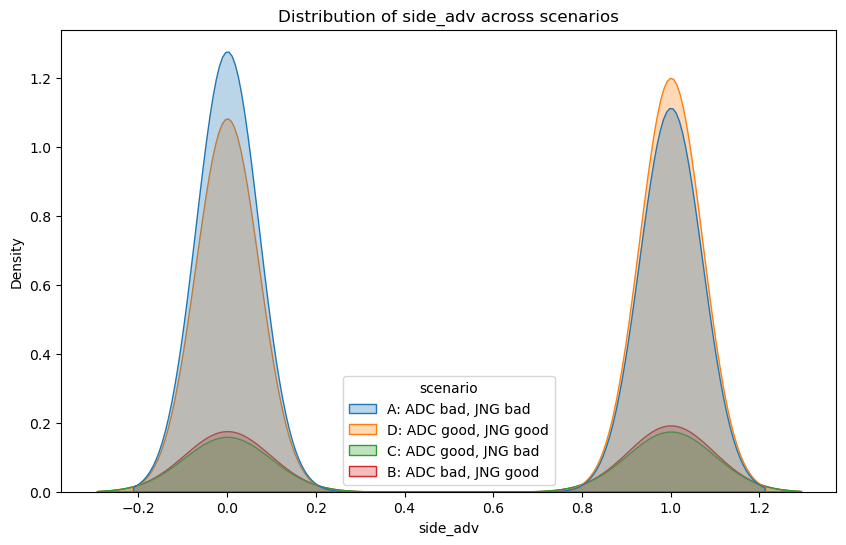

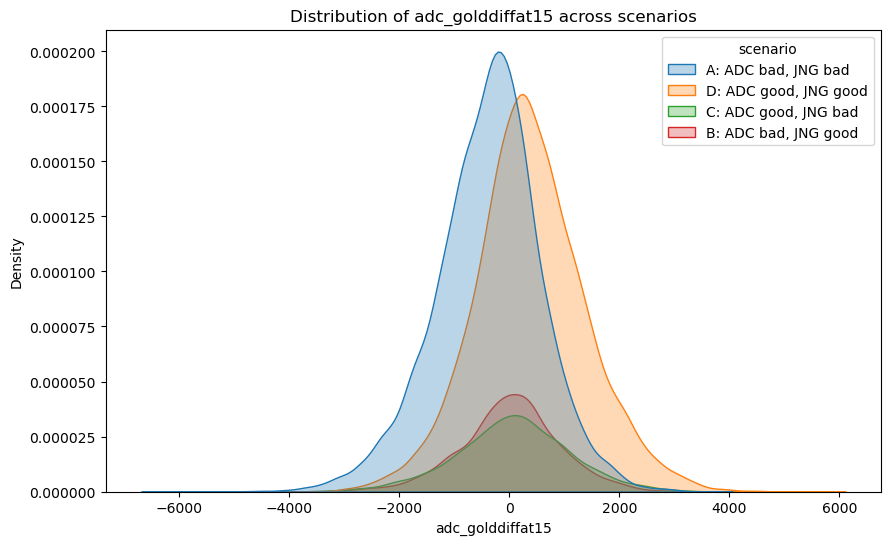

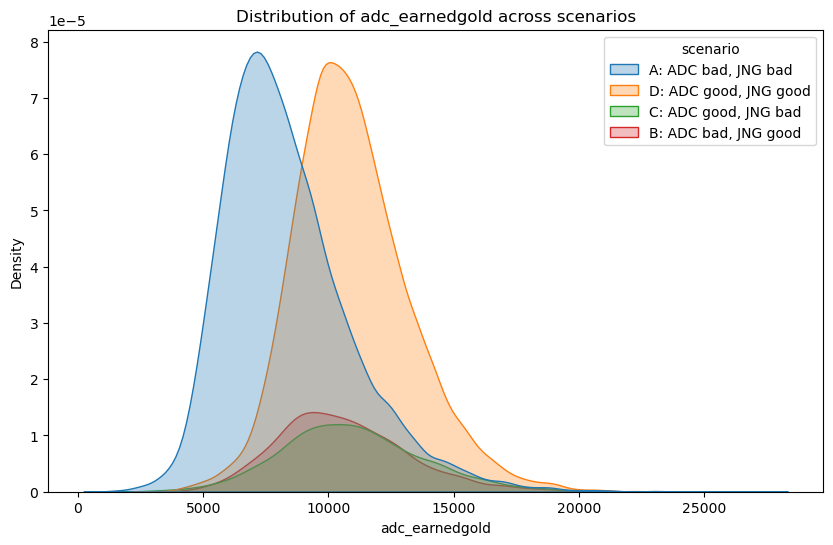

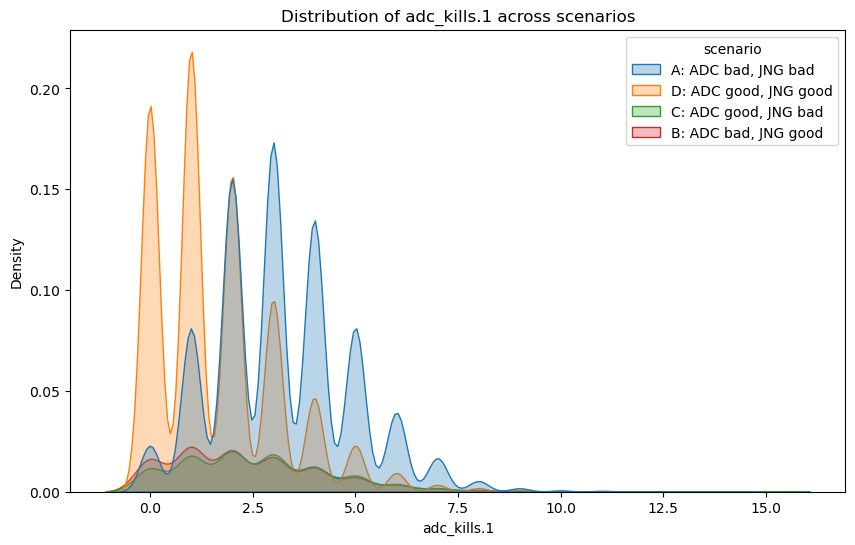

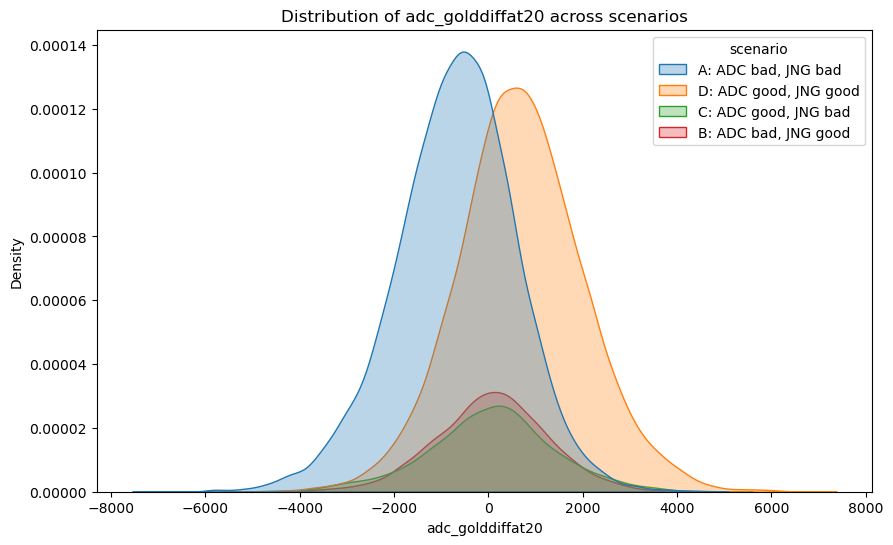

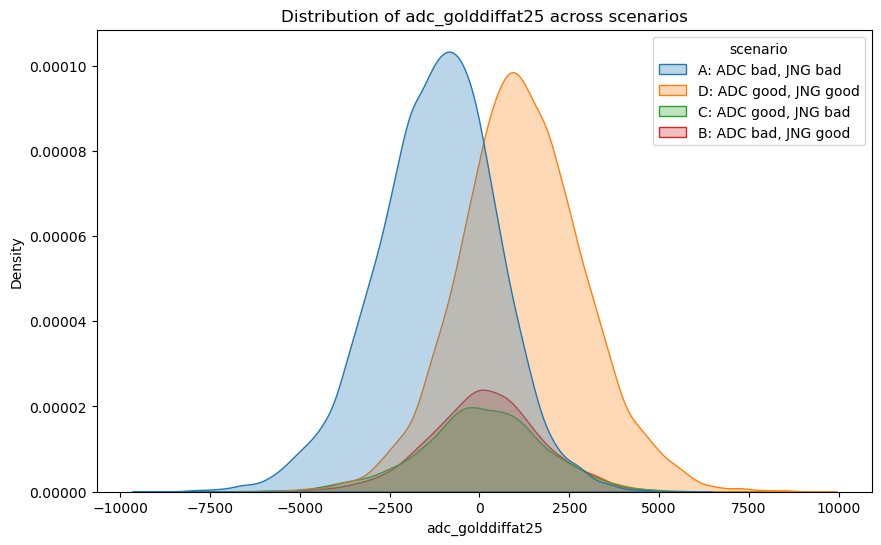

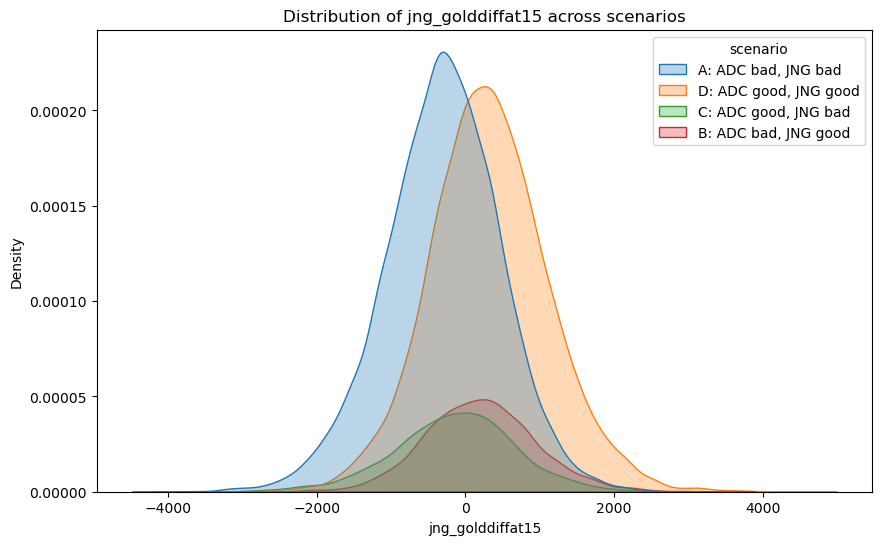

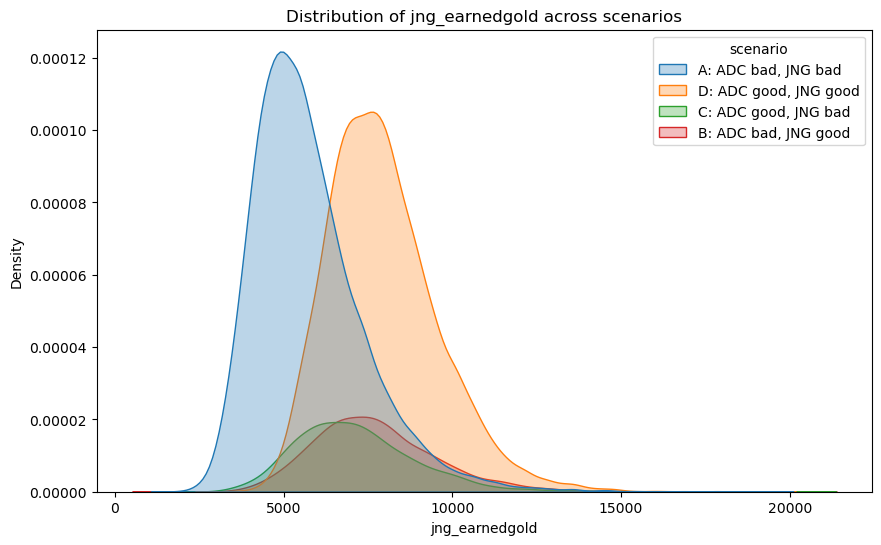

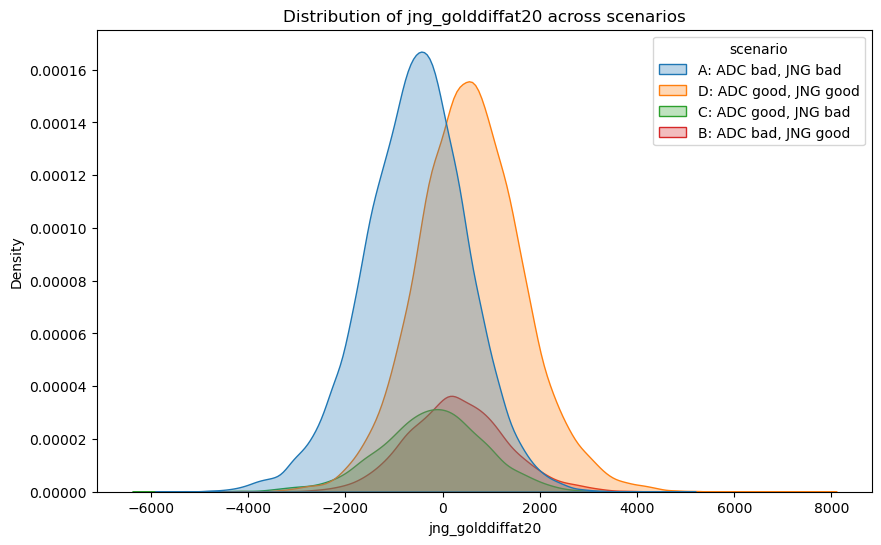

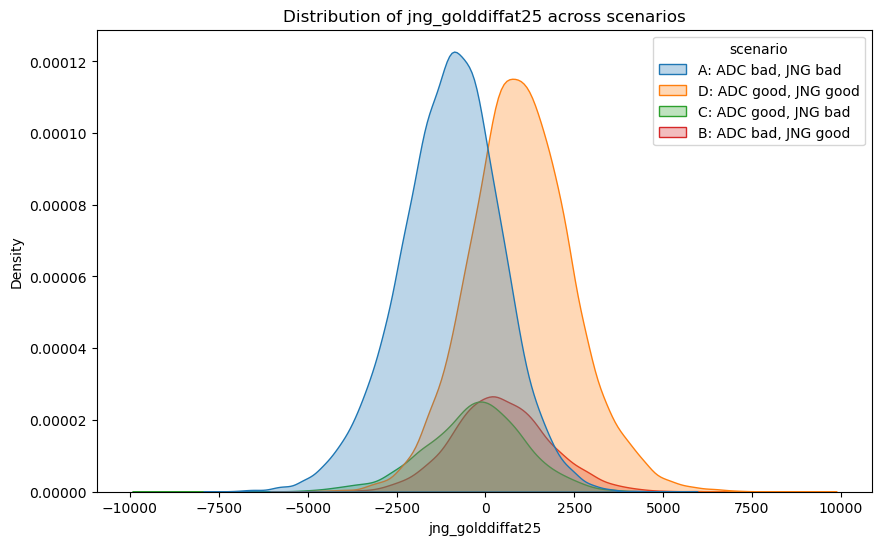

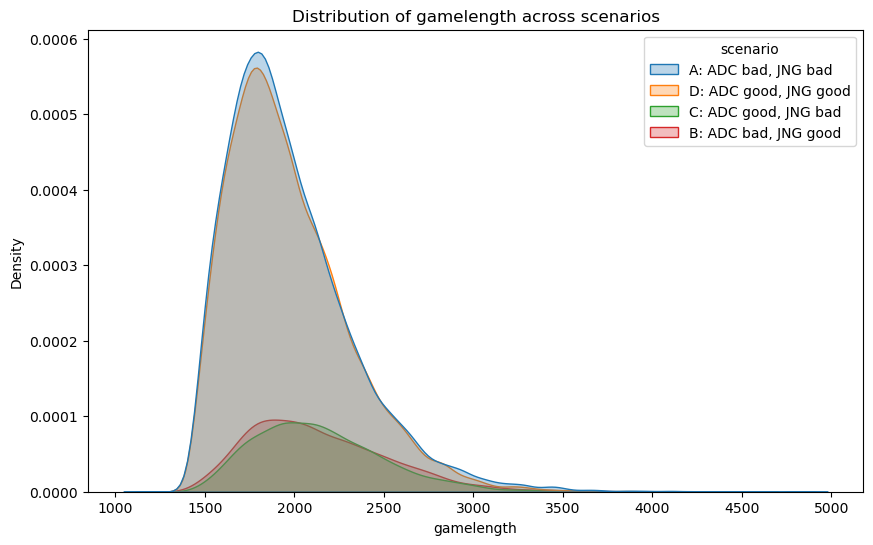

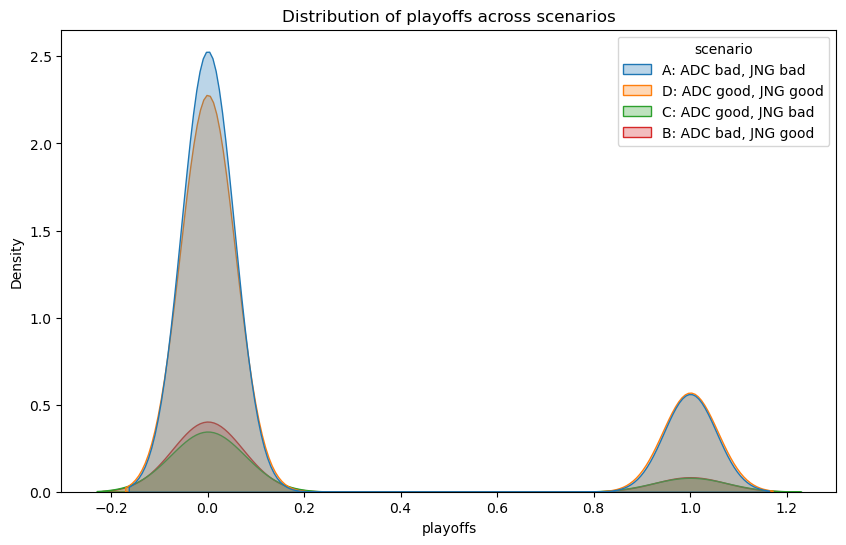

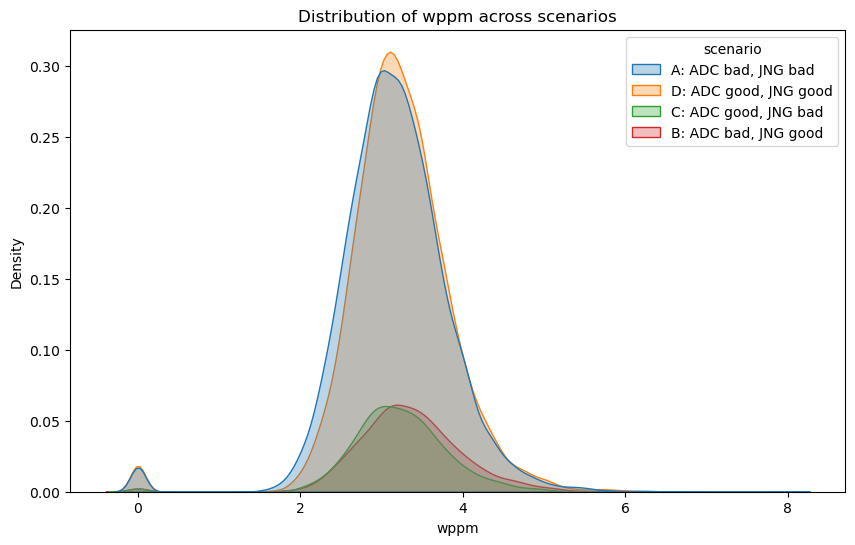

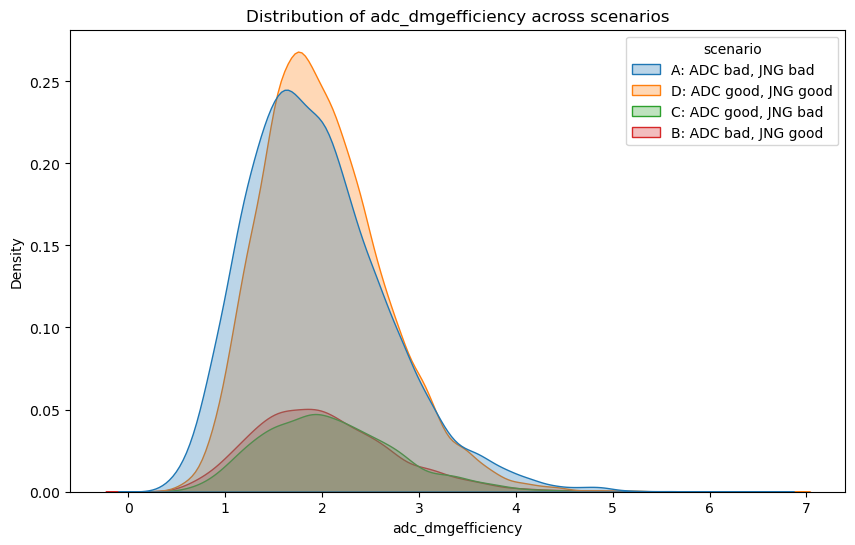

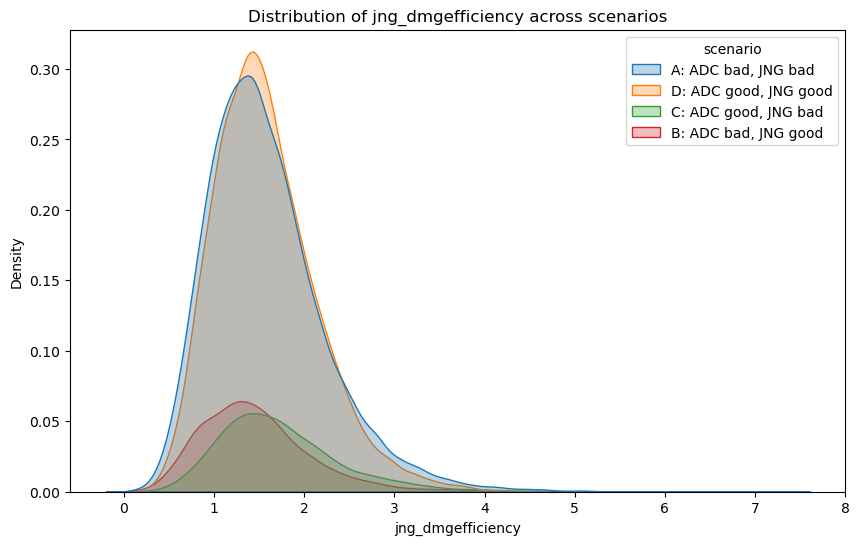

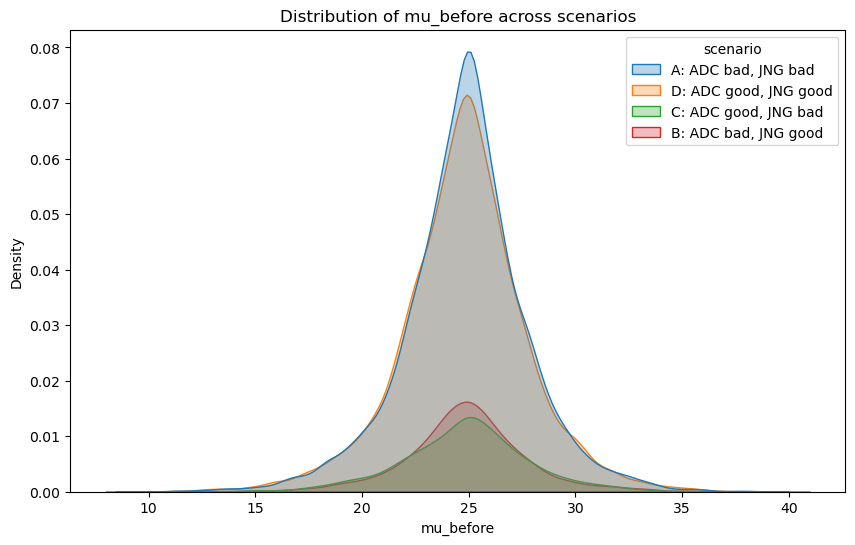

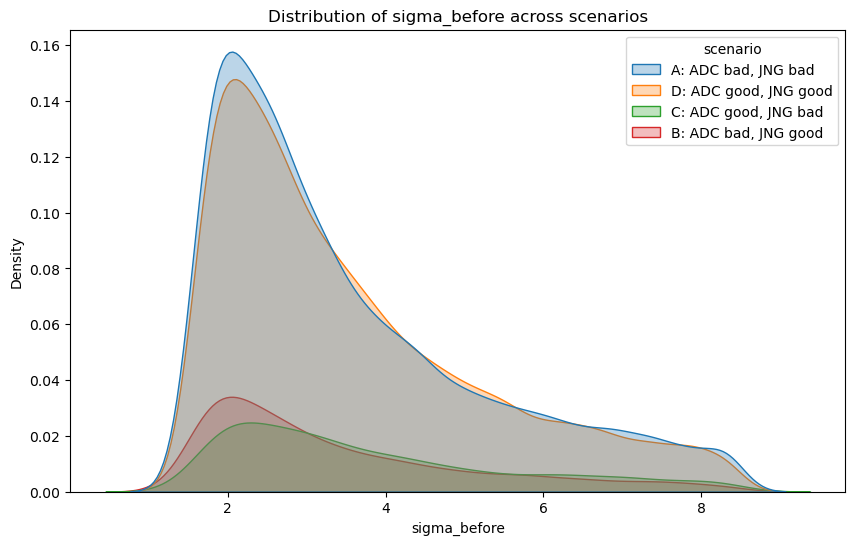

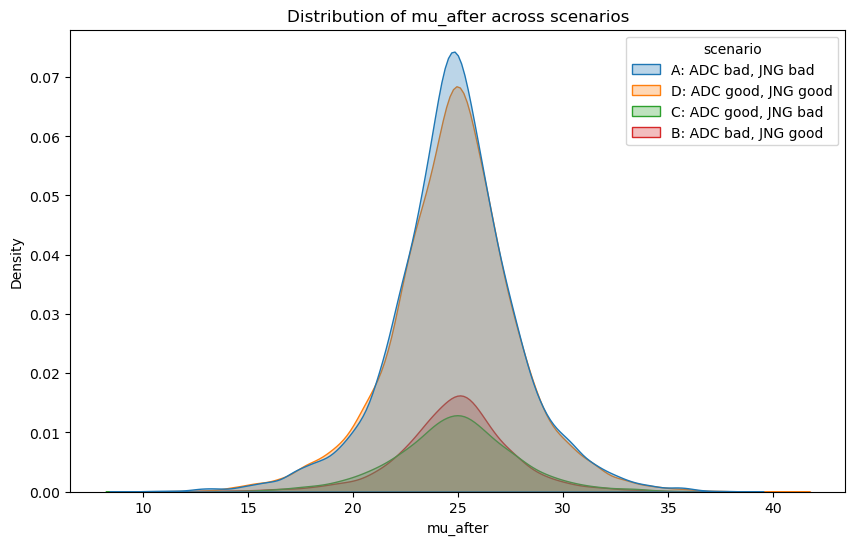

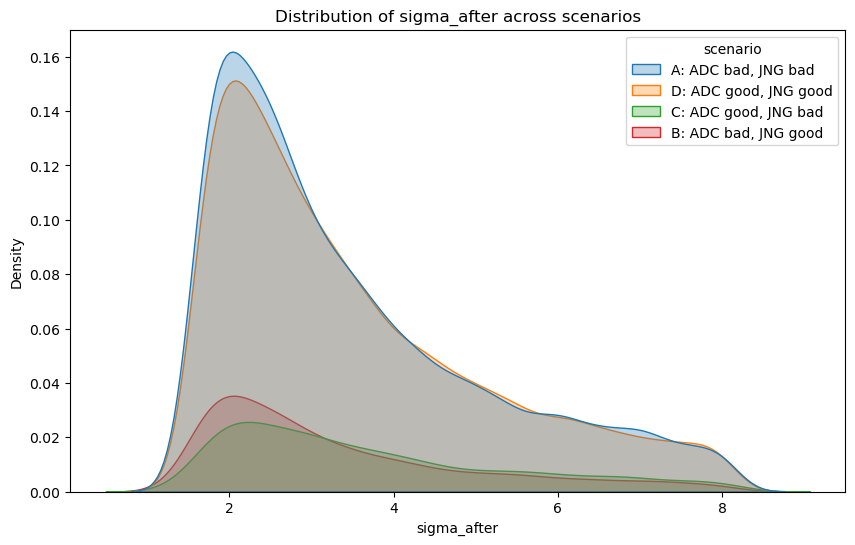

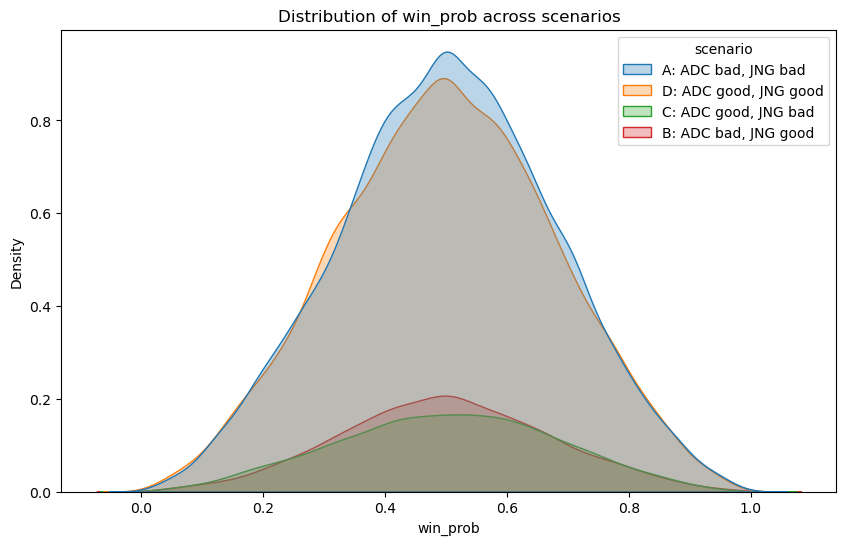

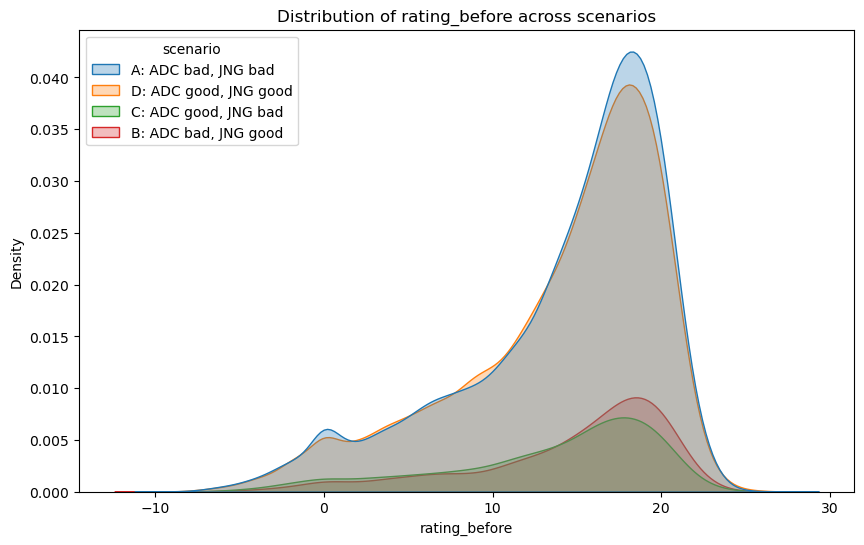

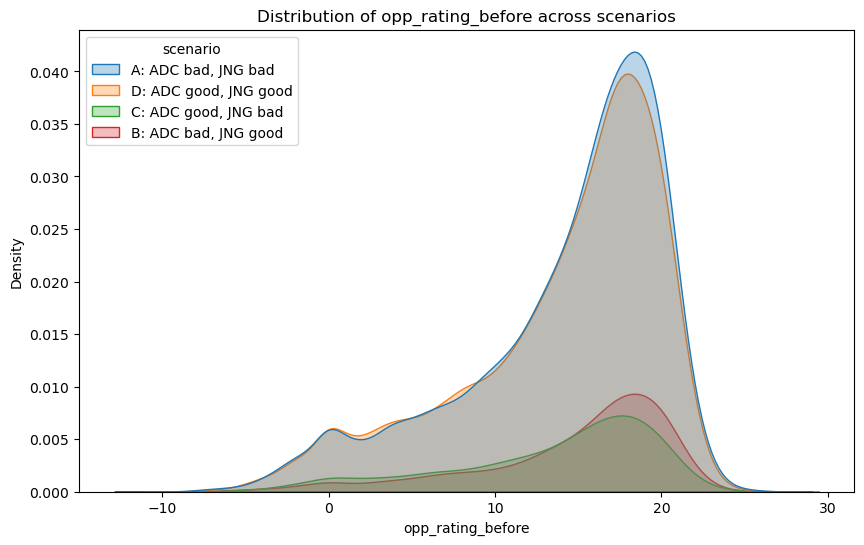

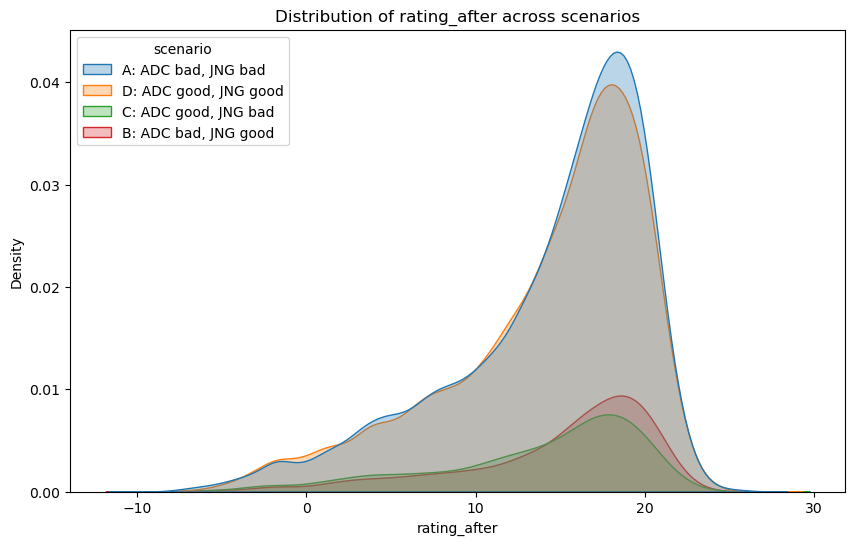

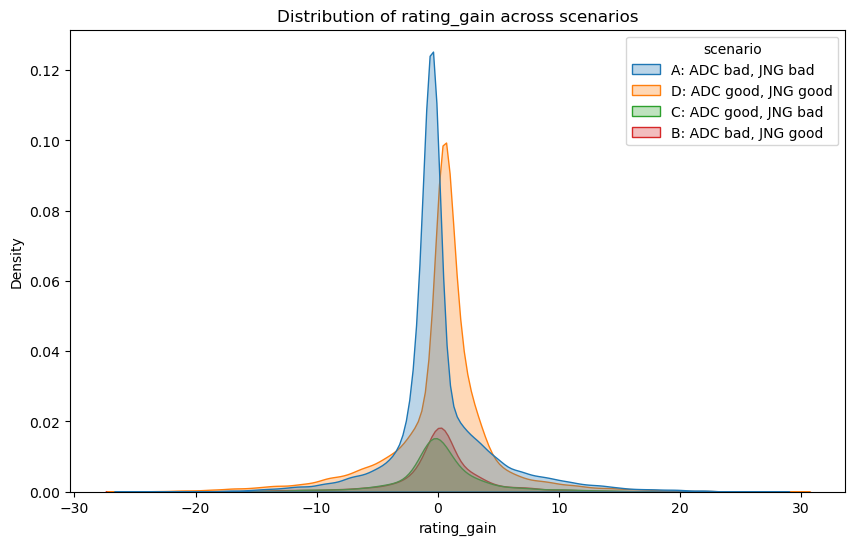

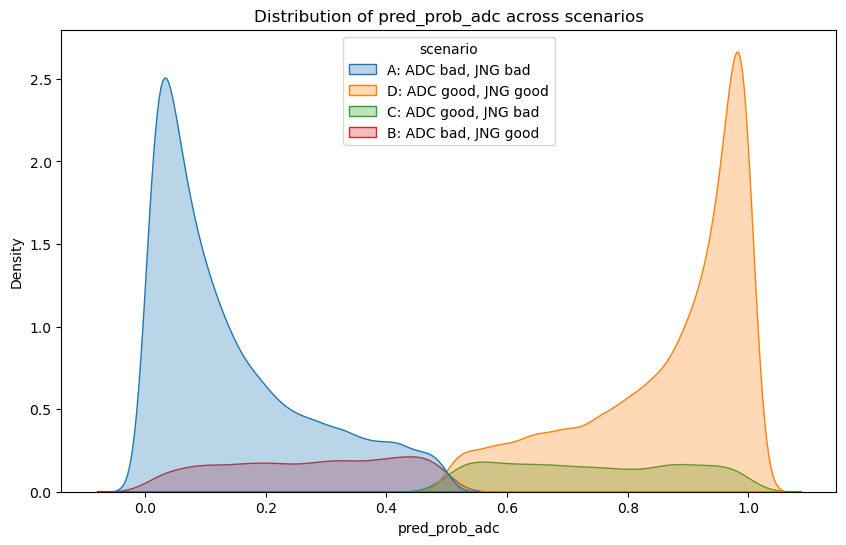

/var/folders/xl/2bww6j5j2b734btbr3qhwvbm0000gn/T/ipykernel_18911/2858437603.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


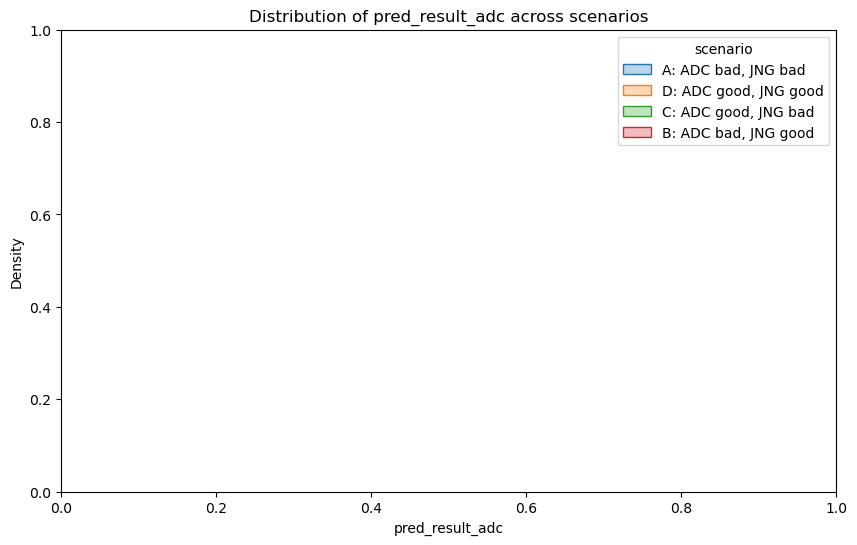

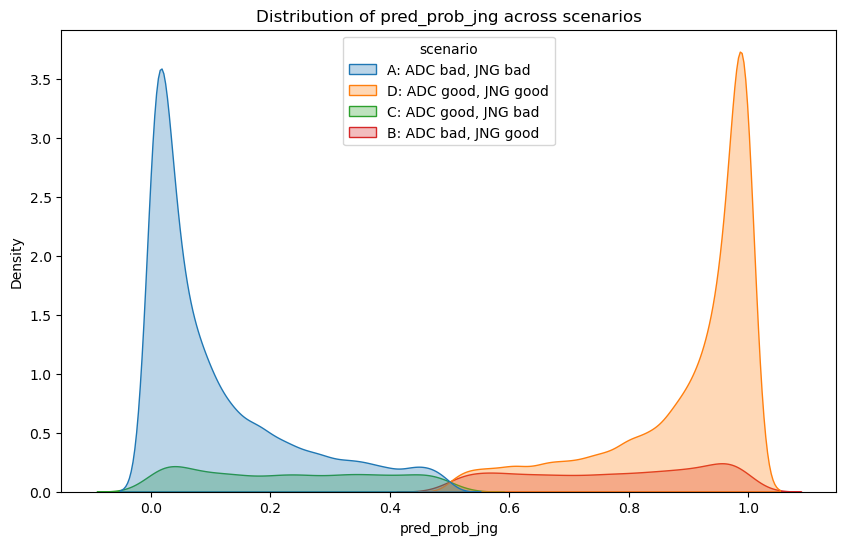

/var/folders/xl/2bww6j5j2b734btbr3qhwvbm0000gn/T/ipykernel_18911/2858437603.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


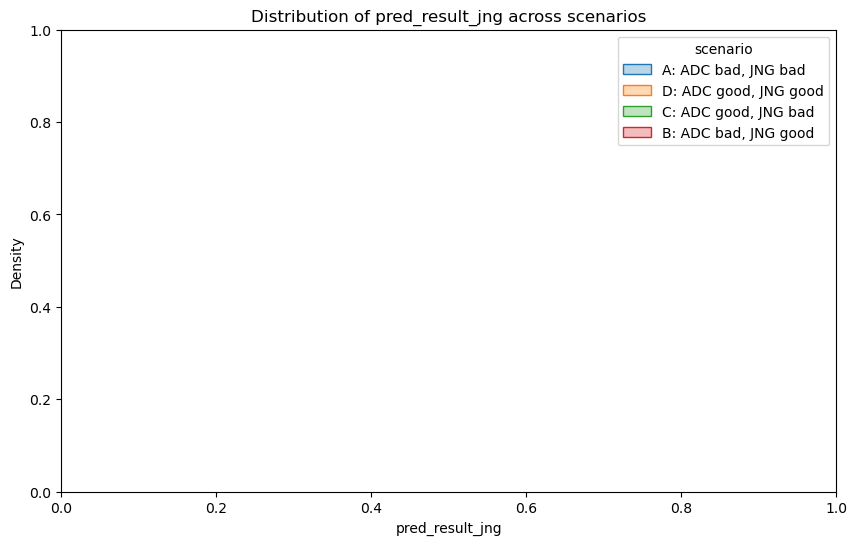

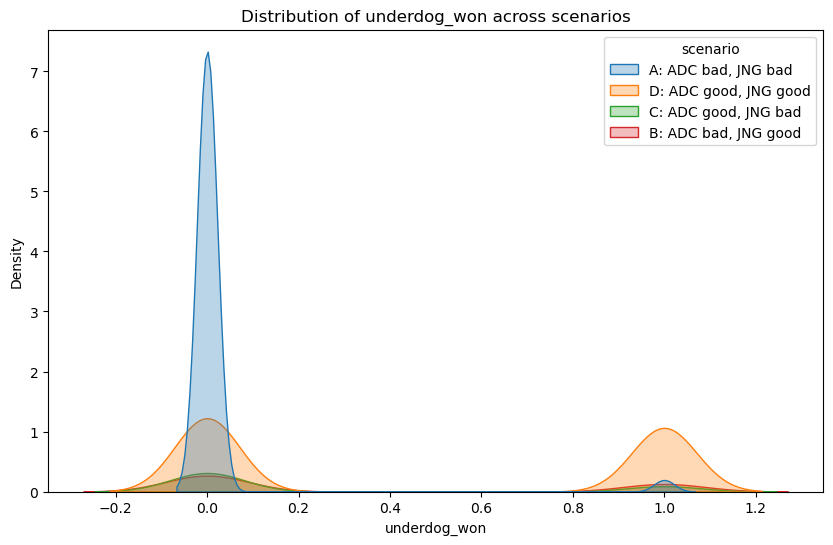

In [299]:

for feature in other_features:
    plt.figure(figsize=(10,6))
    sns.kdeplot(
        data=test_df,
        x=feature,
        hue="scenario",
        common_norm=True, 
        fill=True,
        alpha=0.3
    )
    plt.title(f"Distribution of {feature} across scenarios")
    plt.show()

In [300]:
c['date'] = pd.to_datetime(c['date'])
b['date'] = pd.to_datetime(b['date'])

#df['rating_gain'].describe()
c['rating_diff'] = abs(c['rating_before'] - c['opp_rating_before'])
#c['rating_diff'].describe()
b['rating_diff'] = abs(b['rating_before'] - b['opp_rating_before'])
c['high_rating_diff'] = (c['rating_diff'] > c['rating_diff'].mean()).astype(int)
b['high_rating_diff'] = (b['rating_diff'] > b['rating_diff'].mean()).astype(int)
#b['rating_diff'].describe()
print(f'Max Rating Diff: C: {c['rating_diff'].max()} in B : {b['rating_diff'].max()}')
print(f'Higher than mean rating diff: b: {(b['high_rating_diff'] == 1).sum()}, c: {(c['high_rating_diff'] == 1).sum()}')

Max Rating Diff: C: 23.699654991597157 in B : 24.687065383856652
Higher than mean rating diff: b: 1346, c: 1284


/var/folders/xl/2bww6j5j2b734btbr3qhwvbm0000gn/T/ipykernel_18911/779228389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['date'] = pd.to_datetime(c['date'])
/var/folders/xl/2bww6j5j2b734btbr3qhwvbm0000gn/T/ipykernel_18911/779228389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['date'] = pd.to_datetime(b['date'])
/var/folders/xl/2bww6j5j2b734btbr3qhwvbm0000gn/T/ipykernel_18911/779228389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [301]:
#Look at how many matches an underdog won in each scenario 
print(f'Underdog win % in scenario a: {(a['underdog_won'] == 1).sum() / len(a)}')
print(f'Underdog win % in scenario b: {(b['underdog_won'] == 1).sum() / len(b)}')
print(f'Underdog win % in scenario c: {(c['underdog_won'] == 1).sum() / len(c)}')
print(f'Underdog win % in scenario d: {(d['underdog_won'] == 1).sum() / len(d)}')

Underdog win % in scenario a: 0.025685898159647735
Underdog win % in scenario b: 0.3219656283566058
Underdog win % in scenario c: 0.22406759906759907
Underdog win % in scenario d: 0.46471691478138555


In [302]:
#Look at unexpected losses based on late regression model 
df['pred_prob_late'] = log_reg_late.predict_proba(X_scaled)[:,1]
df['pred_result'] = (df['pred_prob_late'] > 0.5).astype(int)

# Create a dataframe for analysis on the test subset
test_df = df.iloc[y_test.index].copy()

# Add prediction info
test_df['pred_prob_late'] = y_prob
test_df['pred_result'] = (test_df['pred_prob_late'] > 0.5).astype(int)

threshold = 0.5

unexpected_loss = test_df[
    (df['pred_prob_late'] >= threshold) & 
    (df['result'] == 0)
]

unexpected_win = test_df[
    (df['pred_prob_late'] < threshold)&
    (df['result'] == 1)
]

expected_win = test_df[
    (df['pred_prob_late'] >= threshold)&
    (df['result'] == 1)
]

expected_loss = test_df[
    (df['pred_prob_late'] < threshold)&
    (df['result'] == 0)
    ]



/var/folders/xl/2bww6j5j2b734btbr3qhwvbm0000gn/T/ipykernel_18911/2967551319.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unexpected_loss = test_df[
/var/folders/xl/2bww6j5j2b734btbr3qhwvbm0000gn/T/ipykernel_18911/2967551319.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unexpected_win = test_df[
/var/folders/xl/2bww6j5j2b734btbr3qhwvbm0000gn/T/ipykernel_18911/2967551319.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  expected_win = test_df[
/var/folders/xl/2bww6j5j2b734btbr3qhwvbm0000gn/T/ipykernel_18911/2967551319.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  expected_loss = test_df[


In [303]:
#Looking at the columns which we did not use to predict what are the main differences in expected wins and unexpected losses 
other_features = [col for col in test_df.columns if col not in late_features_adc + ['result', 'predicted_prob_late', 'predicted_result_late', 'gameid', 'teamid', 'side', 'date', 'adc_golddiffat20', 'adc_golddiffat25', 'jng_golddiffat20', 'jng_golddiffat25']]

comp_a = unexpected_loss[other_features].mean() - expected_win[other_features].mean()
comp_b = unexpected_win[other_features].mean() - expected_win[other_features].mean()
comp_c = unexpected_loss[other_features].mean() - unexpected_win[other_features].mean()
comp_d = unexpected_win[other_features].mean() - expected_loss[other_features].mean()
comp_e = unexpected_loss[other_features].mean() - expected_loss[other_features].mean()
comp_a.sort_values(ascending=False).head(15)
#comp_b.sort_values(ascending=False).head(15)
#comp_c.sort_values(ascending=False).head(15)
#comp_d.sort_values(ascending=False).head(15)
#comp_e.sort_values(ascending=False).head(15)
#switch around with ascending true or false to see both sides 

damagetochampions           2624.003564
jng_damagetochampions        498.988929
gamelength                   120.801931
adc_damagetakenperminute     111.518069
jng_damagetakenperminute      80.087491
deaths                        12.652450
wardsplaced                    3.887344
jng_deaths                     2.754145
visionscore                    2.519041
adc_kills.1                    2.342614
jng_dmgefficiency              0.371519
adc_dmgefficiency              0.242564
sigma_before                   0.082449
rating_gain                    0.074522
sigma_after                    0.036602
dtype: float64

In [304]:
#Confusin matrix 
TP = len(expected_win)
TN = len(expected_loss)
FP = len(unexpected_loss)
FN = len(unexpected_win)

cm = [
    [TP, FP],
    [FN, TN]
]
print(cm)

[[14690, 4591], [6085, 16566]]


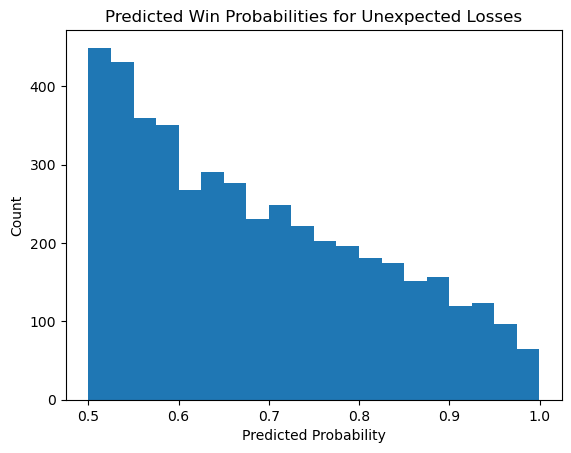

In [305]:
import matplotlib.pyplot as plt

plt.hist(unexpected_loss['pred_prob_late'], bins=20)
plt.title("Predicted Win Probabilities for Unexpected Losses")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.show()